# 1- Perkenalan 

Nama      : Ucik Refani Kurnia Sari

Kelas     : FTDS Batch R016

Query     : SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,default_payment_next_month 
FROM bigquery-public-data.ml_datasets.credit_card_default
LIMIT 31936

Objective : Memprediksi apakah nasabah akan default di bulan-bulan mendatang atau tidak dengan melihat riwayat transaksi kartu kredit nasabah selama 6 bulan terakhir. 

# Latar Belakang : 

Gagal bayar kartu kredit merupakan suatu masalah ketidaksanggupan pengguna dalam membayar tagihan kartu kredit. saat seseorang menggunakan kartu kredit untuk melakukan pembelian, akun tersebut akan menghasilkan saldo yang harus dilunasi setiap bulannya. pembayaran kartu kredit yang hilang 1 atau 2 kali tidak dihitung sebagai default. gagal bayar sendiri terjadi apabila seseorang gagal membayar jumlah minimum jatuh tempo pada kartu kredit selama beberapa bulan berturut-turut.

# Problem Statement 
1. berapa banyak pengguna kartu kredit yang gagal bayar?

2. umur berapa yang banyak memiliki kartu kredit?

3. Apakah laki-laki/perempuan yang memiliki gagal bayar tertinggi?

4. Tingkat pendidikan apa yang memiliki gagal bayar tertinggi?

5. Berdasarkan status pernikahan, mana yang gagal bayar lebih banyak?

6. Apakah pada bulan September 2005 masih banyak yang menunggak?

7. Pada tingkat pendidikan apa yang memiliki batas kredit paling tinggi yang ditawarkan oleh pihak bank?



# 2 - Import Libraries

In [1]:
#Import LIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# 3 - Data Loading

In [2]:
#Load Data
data = pd.read_csv('h8dsft_P1M1_UcikRefani.csv')

In [3]:
#Display the top 5 rows
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [4]:
#Display the bottom 5 rows
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


In [5]:
#See number of rows and columns
data.shape

(2965, 24)

berisi 2965 baris dan 24 kolom 

In [6]:
#Checking the datatype of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

- tidak terdapat nilai null. setiap kolom terisi 2965
- hanya berisi integer (bilangan bulat)

mengganti nama kolom default_payment_next_month menjadi default_pay agar lebih singkat. 
mengganti nama kolom pay_0 menjadi pay_1, agar berurutan untuk lebih mudah dipahami

In [7]:
#Rename Columns 
data.rename(columns={'default_payment_next_month':'default_payment'}, inplace=True)
data.rename(columns={'pay_0':'pay_1'}, inplace=True)

In [8]:
#Categorical and Numerical columns
data_num = ['limit_balance', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
data_cat =['sex', 'education_level', 'marital_status', 'default_payment']

# 4 - Exploratory Data Analysis (EDA)

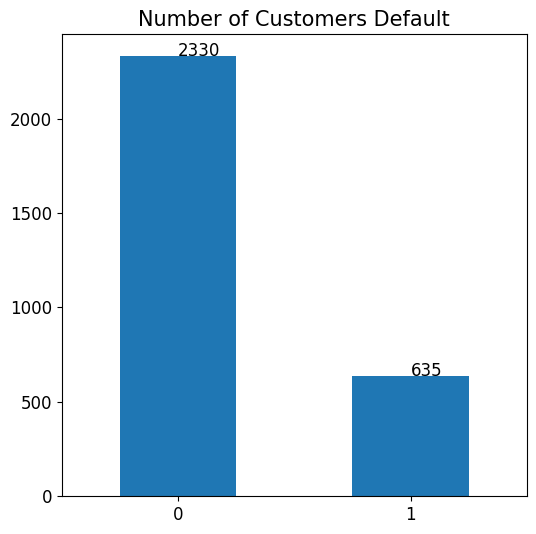

In [9]:
#Visualize default_payment
def_cnt = data.default_payment.value_counts()
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Number of Customers Default", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

Seperti yang dapat kita lihat, dataset berisi 78,57% kelas 0 dan 21,43% kelas 1. kelas 0 dan kelas 1 tidak proporsional, maka dataset tidak seimbang (imbalanced dataset). dimana proporsi yang default payment next month lebih sedikit daripada yang tidak. 

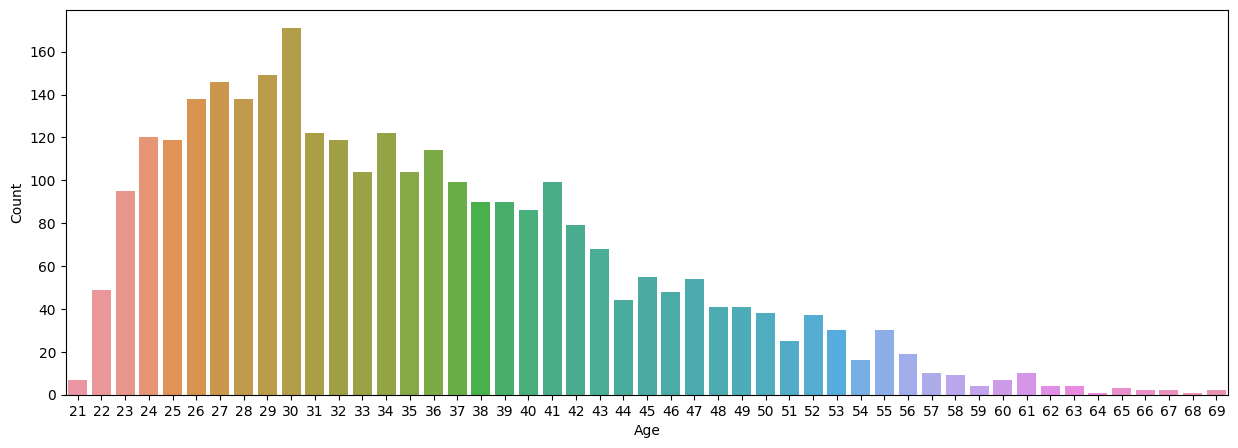

In [18]:
#Visualize of age 
plt.figure(figsize=(15,5))
age=data['age'].value_counts().reset_index()
sns.barplot(x='index',y='age',data=age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

dari gambar diatas, terlihat bahwa yang memiliki kartu kredit tertinggi pada umur 30 tahun, yang kedua pada umur 29 tahun, dan yang paling rendah pada umur 59 dimana seseorang sudah mulai hidup lebih minimalist dibandingkan dengan yang muda. 

In [15]:
data[data_num].describe()

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518
std,125030.415472,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000
max,800000.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Terlihat bahwa semua kolom (20 kolom numerical) memiliki jumlah baris yang sama yaitu 2965 baris, artinya tidak ada nilai yang hilang. 

- batas kredit maksimal yaitu sebesar 800.000 NT dollar dan minimalnya adalah 10.000 NT dollar
- umur terendah yang memiliki kartu kredit yaitu 21 tahun dan umur tertinggi yang memiliki kartu kredit adalah 69 tahun.

In [12]:
data['sex'].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

- 1 adalah male (pria)
- 2 adalah female (Wanita)

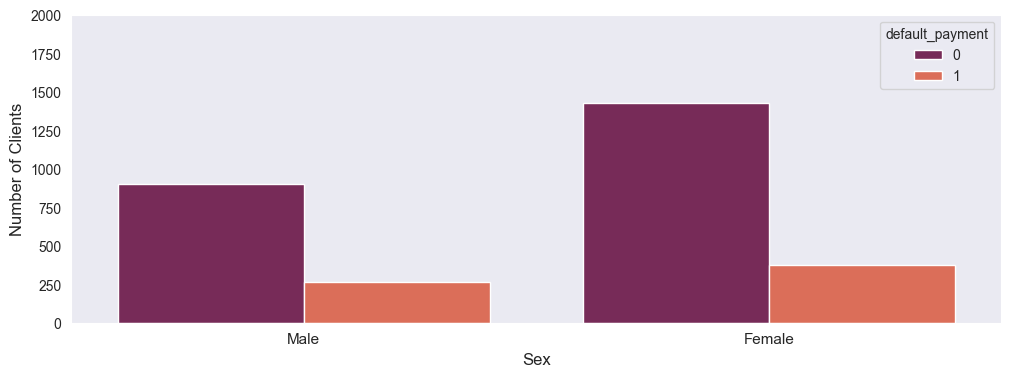

In [86]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'sex', hue="default_payment", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,2000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.show()

Berdasarkan diatas, jumlah yang memiliki kartu kredit lebih banyak perempuan daripada laki-laki. sehingga, perempuan memiliki peluang lebih besar gagal bayar. 

In [14]:
data['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

1 = graduate school;
2 = university;
3 = high school; dan
4= others

terlihat dalam kumpulan data bahwa, terdapat nilai 0,5, dan 6 yang tidak memiliki deskripsi sehingga kita dapat menjumlahkannya dalam 4 yaitu Others. 


In [15]:
#Recategory columns
fil = (data['education_level'] == 5) | (data['education_level'] == 6) | (data['education_level'] == 0)
data.loc[fil, 'education_level'] = 4
data['education_level'].value_counts()

2    1400
1    1039
3     483
4      43
Name: education_level, dtype: int64

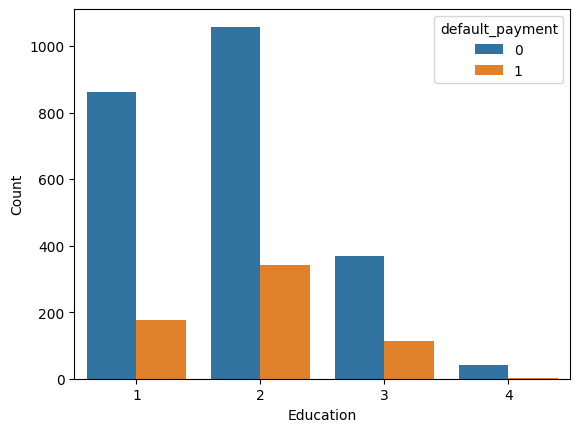

In [16]:
#Number of education_level
plt.figure(dpi=100)
data.education_level.value_counts()
sns.countplot(x="education_level", hue="default_payment", data=data)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

Berdasarkan tingkat pendidikan, yang default payment (gagal bayar) kebanyakan dari kolom 2 yaitu kelas universitas, namun yang memenuhi tanggung jawabnya (tidak gagal bayar) juga lebih banyak. hal ini mengindikasikan bahwa pada pendidikan universitas mayoritas memiliki kartu kredit dan mengalami penunggakan pembayaran yang tinggi pula. 

In [17]:
data['marital_status'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

1 = married;
2= single; dan
3= others

ada 4 nilai 0 yang artinya tidak terdeteksi, sehingga ditambahkan pada kategori lainnya (Others)

In [18]:
#Recategory columns
fil = data['marital_status'] == 0
data.loc[fil, 'marital_status'] = 3
data['marital_status'].value_counts()

2    1594
1    1332
3      39
Name: marital_status, dtype: int64

yang memiliki jumalh tertinggi adalah no kategori 2 yaitu status nasabah single. 

/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_1532/3380632178.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = "marital_status", y = "default_payment", data = data, palette = 'rocket', ci=None)


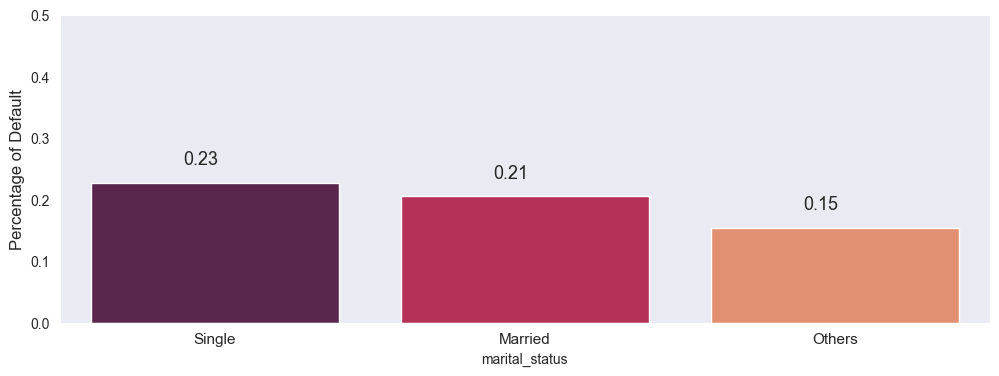

In [96]:
#Visualize marital status
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "marital_status", y = "default_payment", data = data, palette = 'rocket', ci=None)

plt.ylabel("Percentage of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Single', 'Married' ,'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

Kategori lainnya 'Others' menunjukkan probabilitas gagal bayar yang lebih rendah. 
nasabah yang berstatus single memiliki kemungkinan gagal bayar yang paling tinggi sedangkan yang menikah memiliki kemungkinan gagal bayar lebih sedikit. 

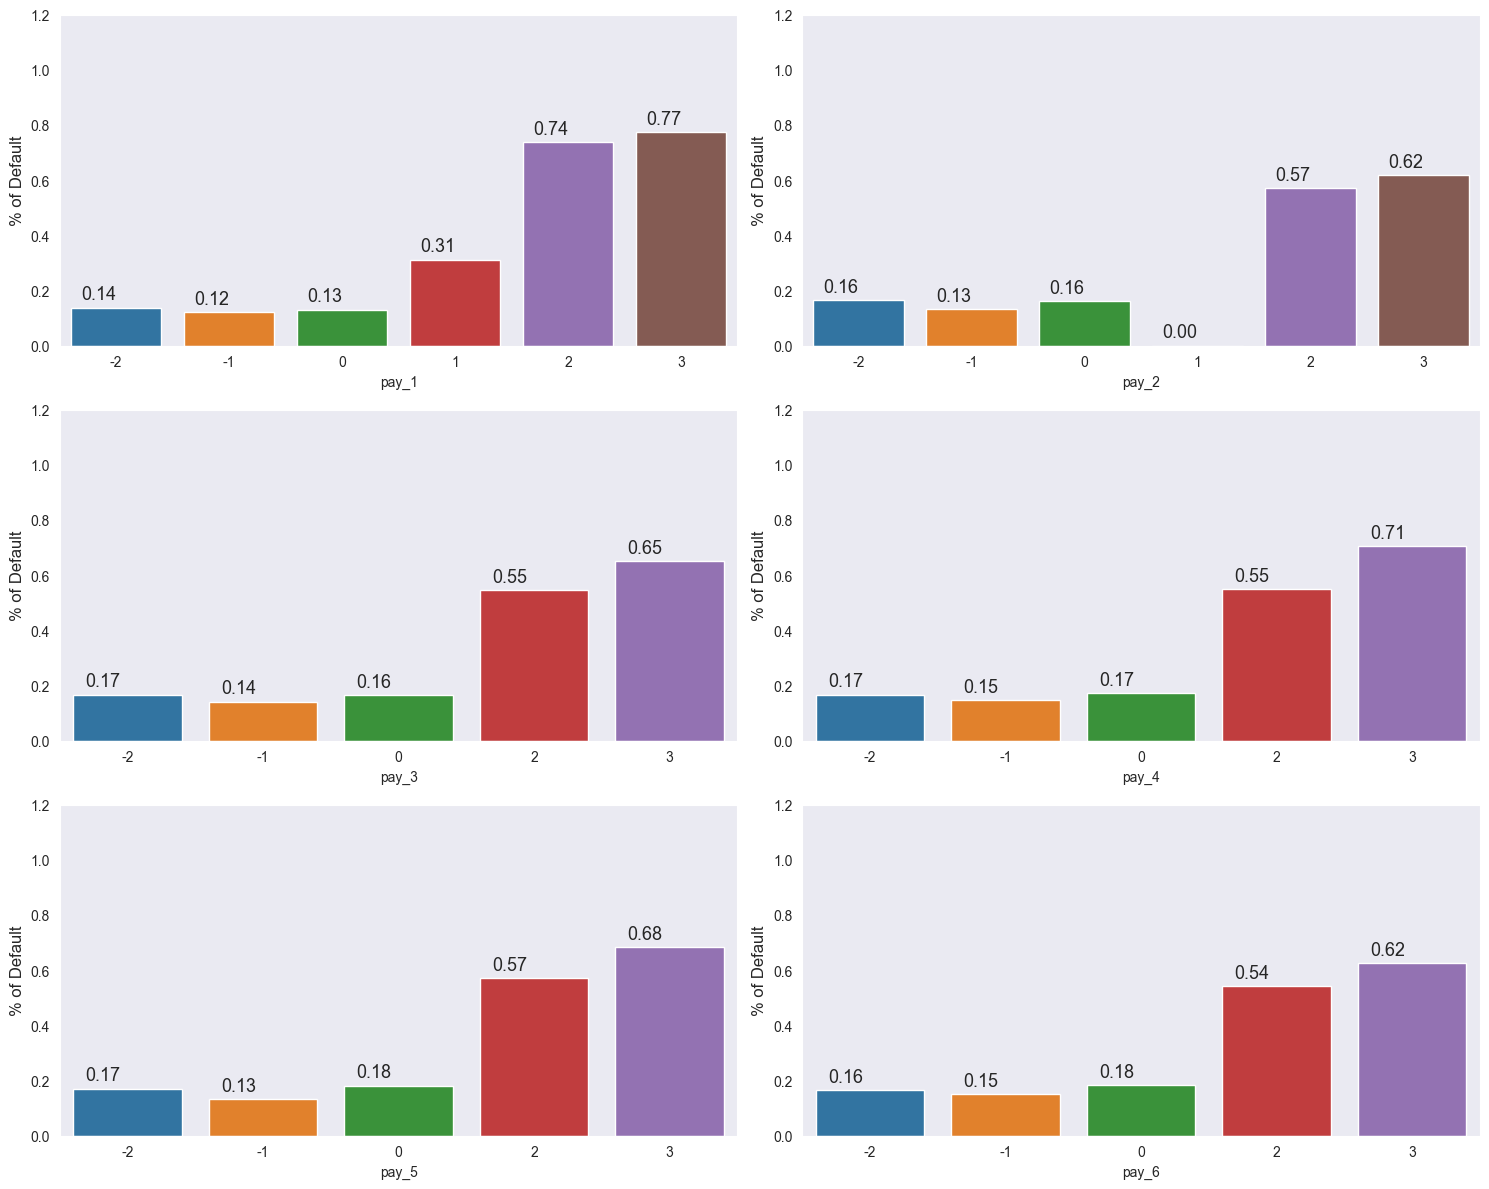

In [109]:
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment", data = data, ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

Status pelunasan pada bulan September (pay_1) menunjukkan bahwa masih banyak yang menunggak sampe 3 bulan dan justru meningkat dari bulan sebelum- sebelumnya. 
justru sangat sedikit yang membayar full atau pelunasan daripada yang menunggak. namun, ada juga yang tidak menggunakan kartu kredit nya untuk membeli sesuatu sehingga tidak ditemukan tagihan yang mana di implementasikan -2. ada juga yang membayar minimum nya saja, yang mana diimplementasikan angka 0. 
pada bulan april sampai agustus tidak ada yang menunggak 1 bulan. kemudian yang bulan agustus tidak segera membayar sehingga menunggak pada bulan september. 

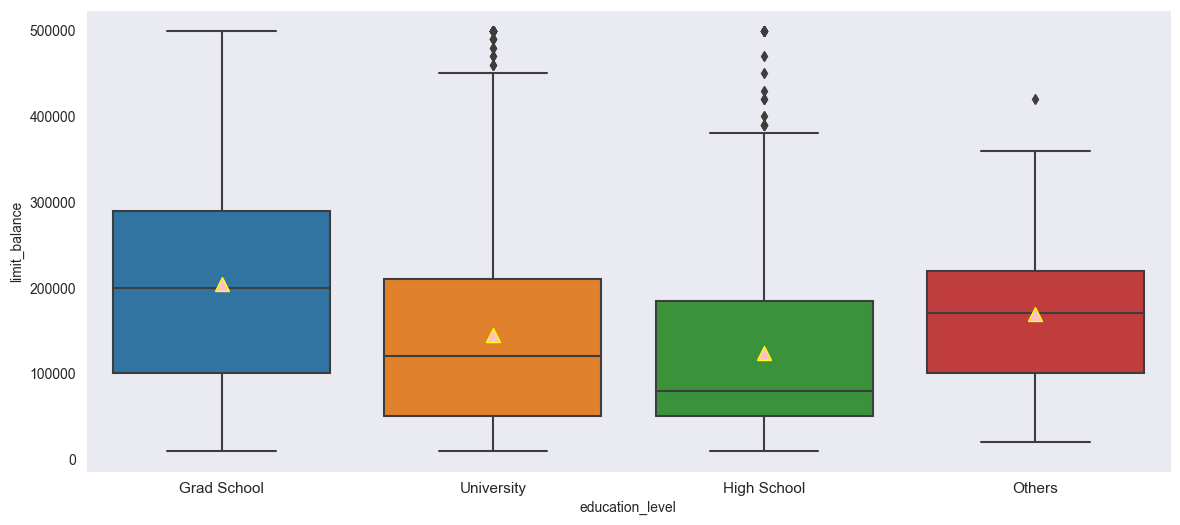

In [122]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "education_level", y = "limit_balance", data = data, showmeans=True, 
            meanprops={"markerfacecolor":"pink",  "markeredgecolor":"yellow", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

plt.show()

Secara umum, batas kredit tertinggi dimiliki oleh Graduate school, hal ini disesuaikan dengan kemampuan nasabah membayar tepat waktu sesuai dengan tingkat pendidikannya. di dalam kategori Other, dalam insight sebelumnya memiliki kemungkinan gagal bayar paling rendah, seharusnya pihak bank berani menawarkan batas kredit yang tinggi, namun, pada kenyataanya batas kredit Others justru lebih rendah daripada lainnya. 

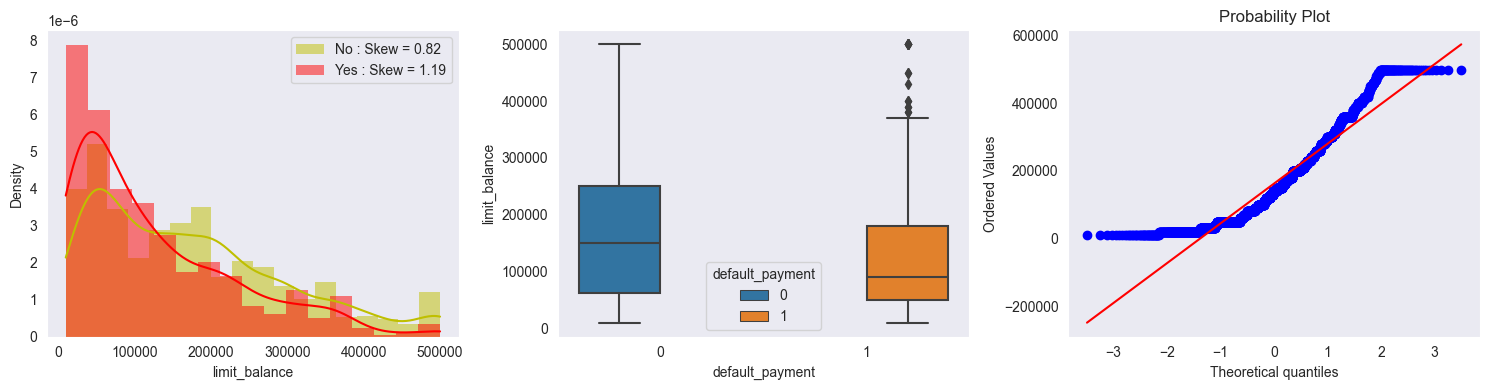

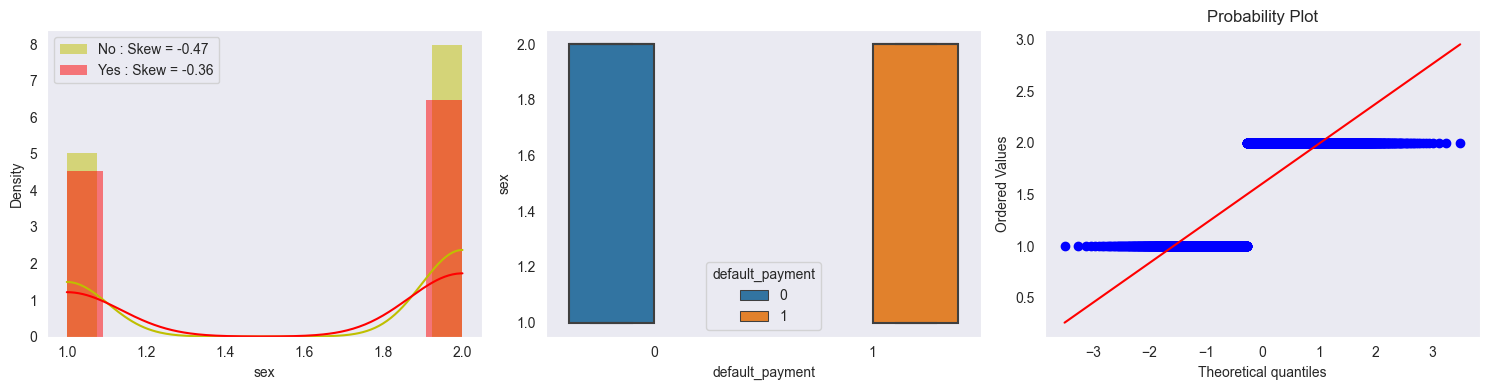

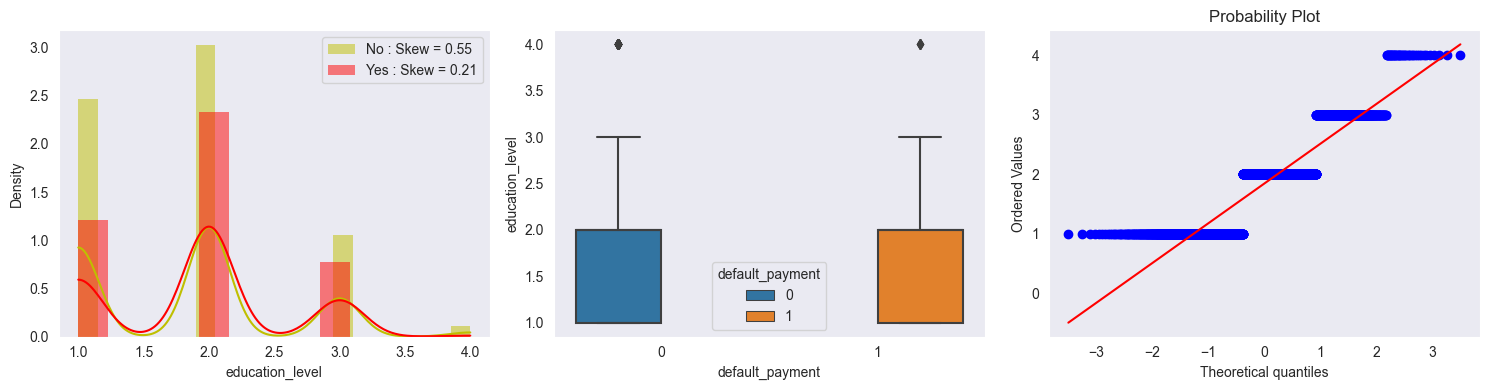

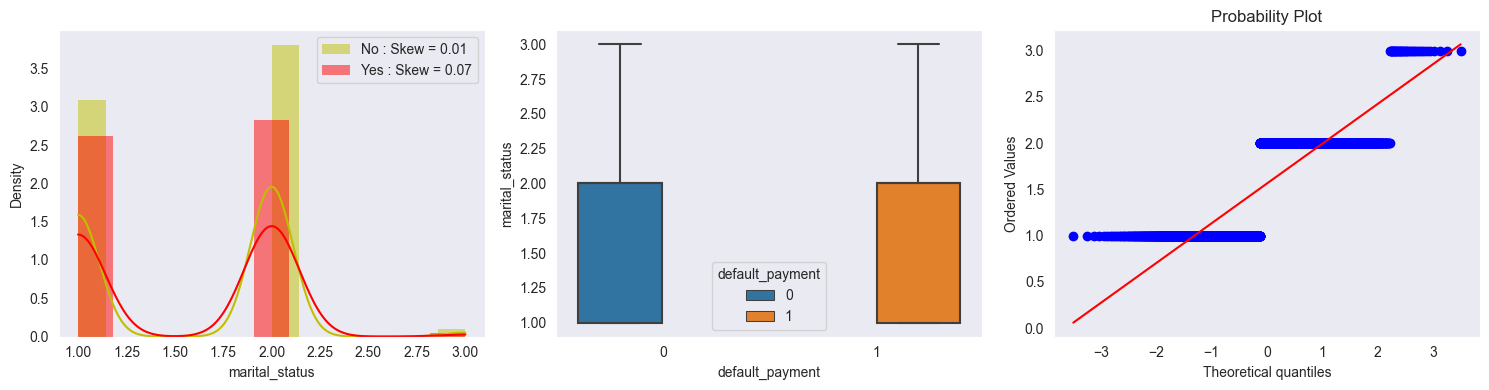

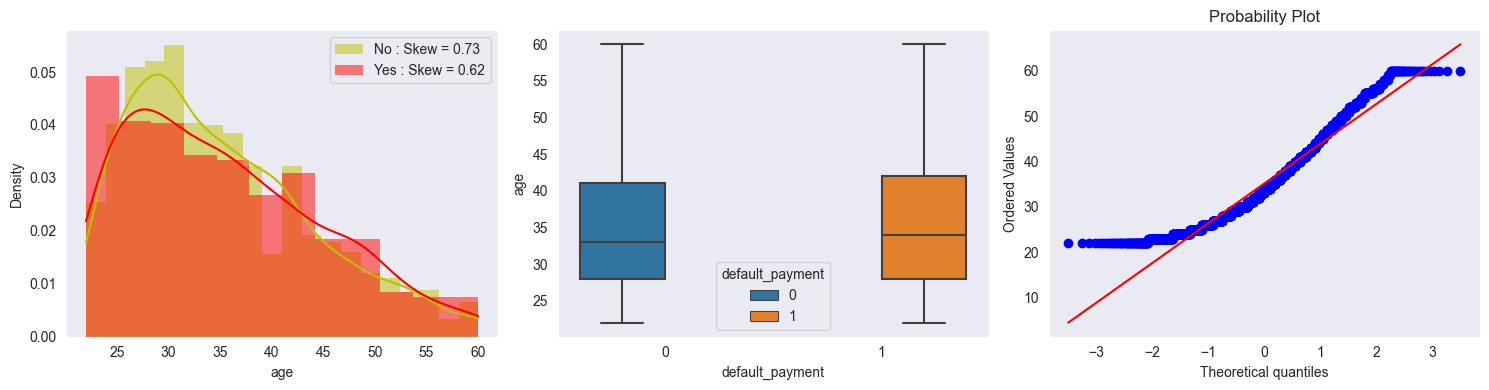

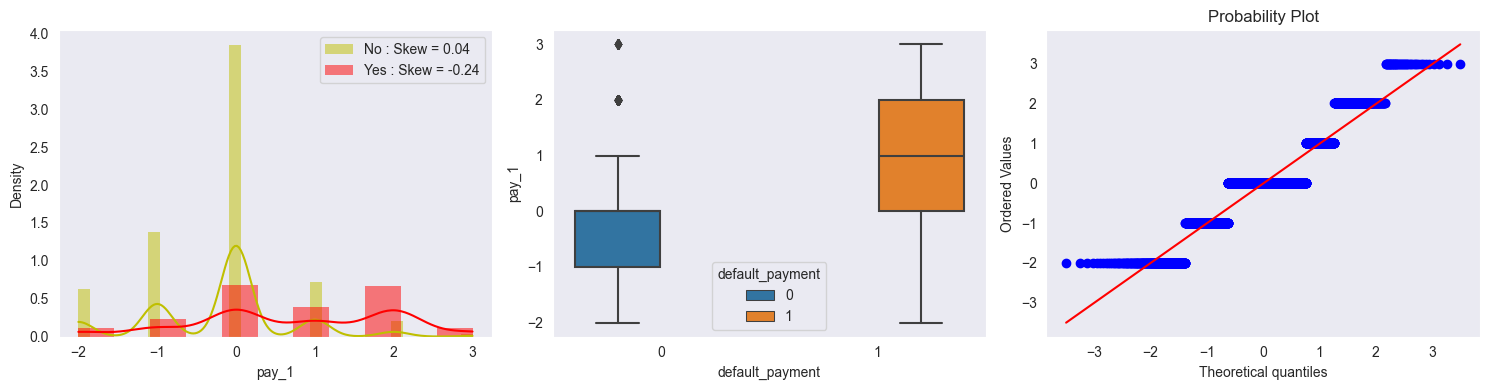

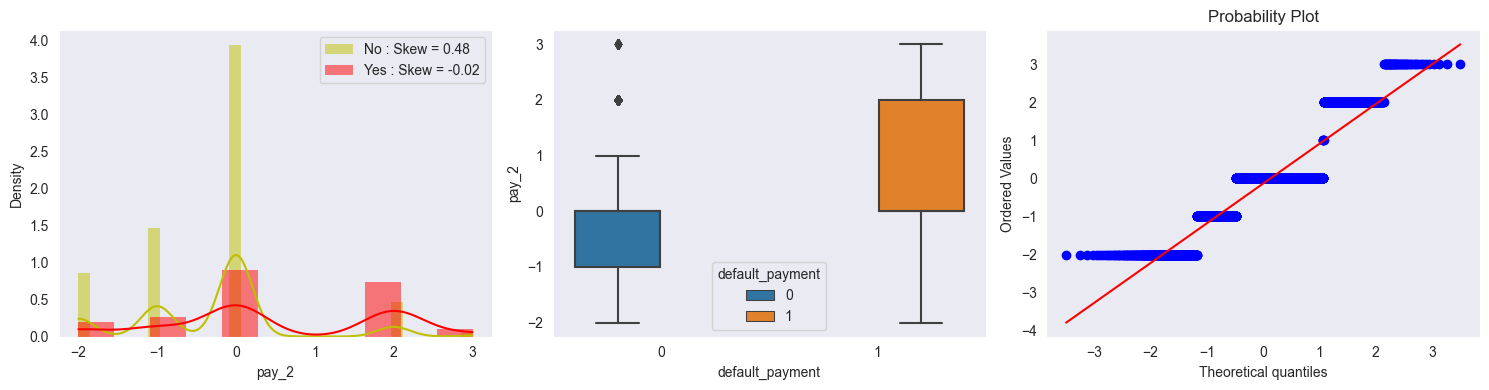

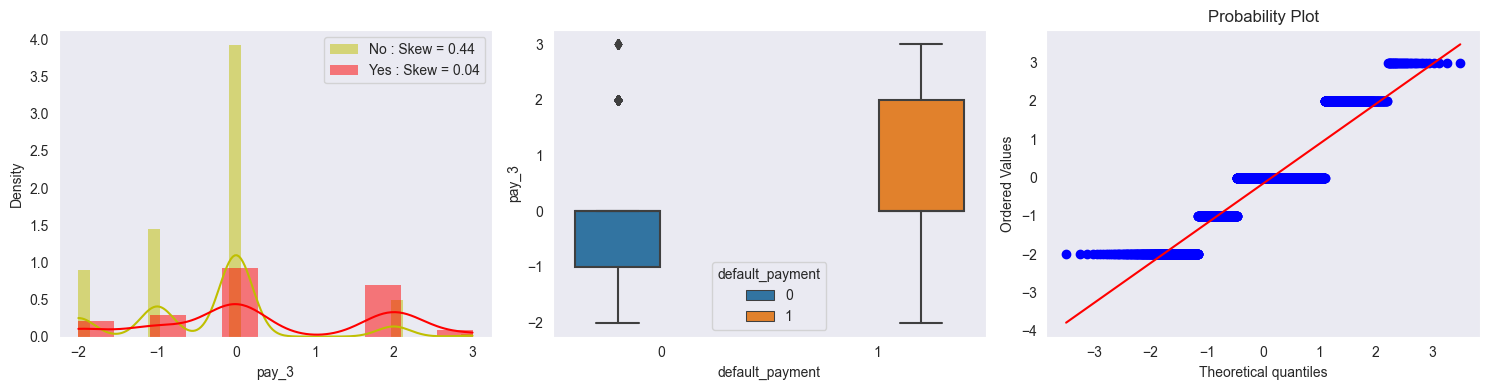

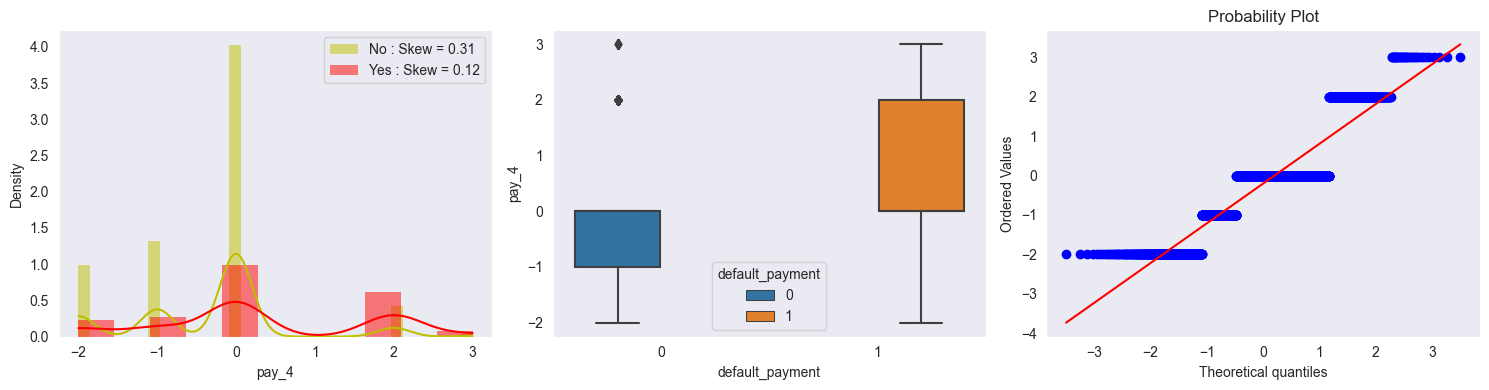

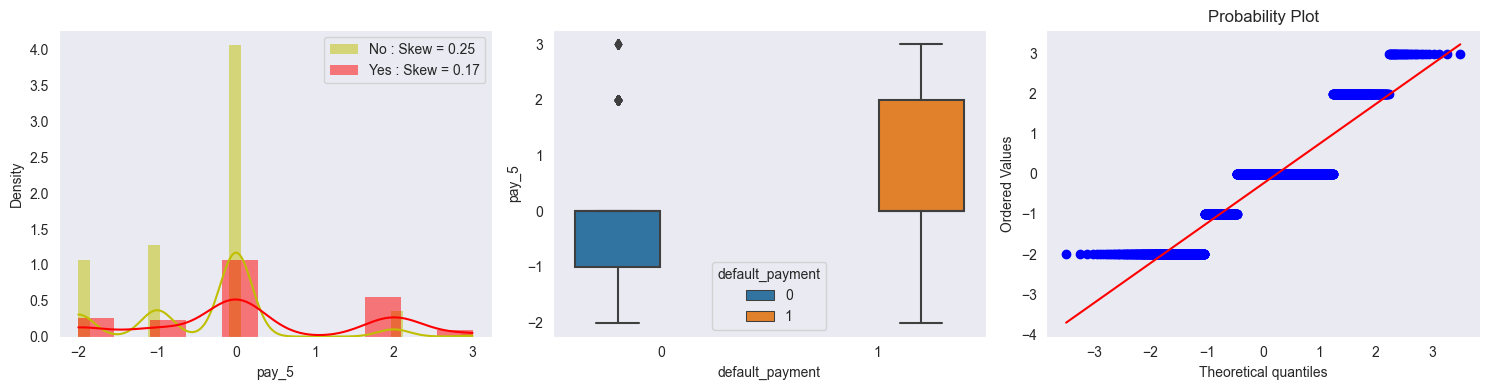

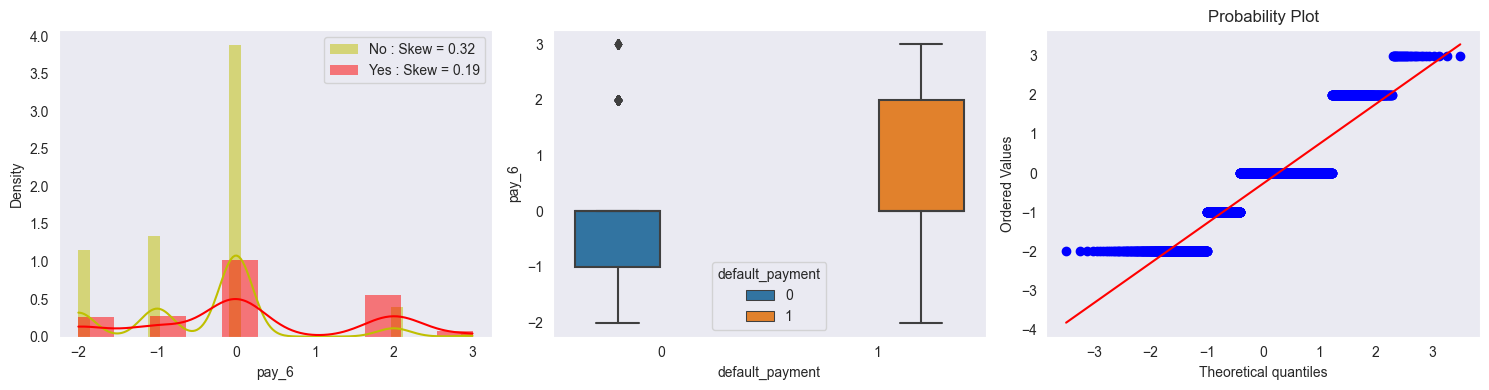

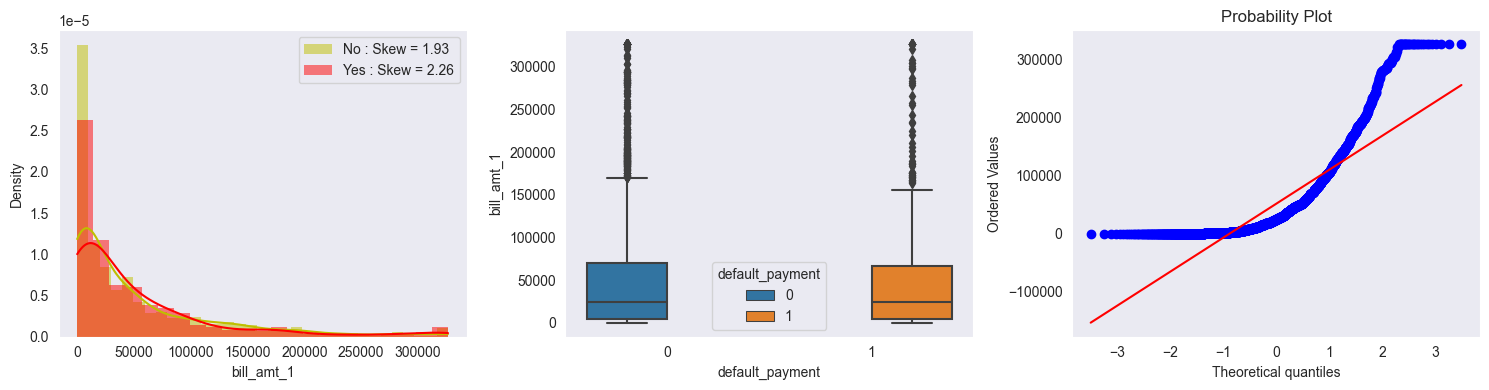

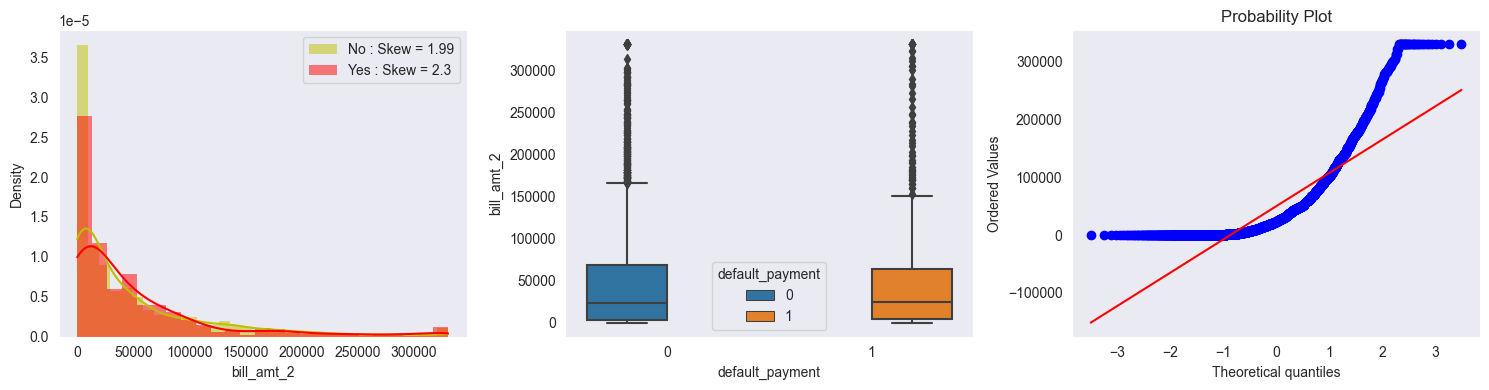

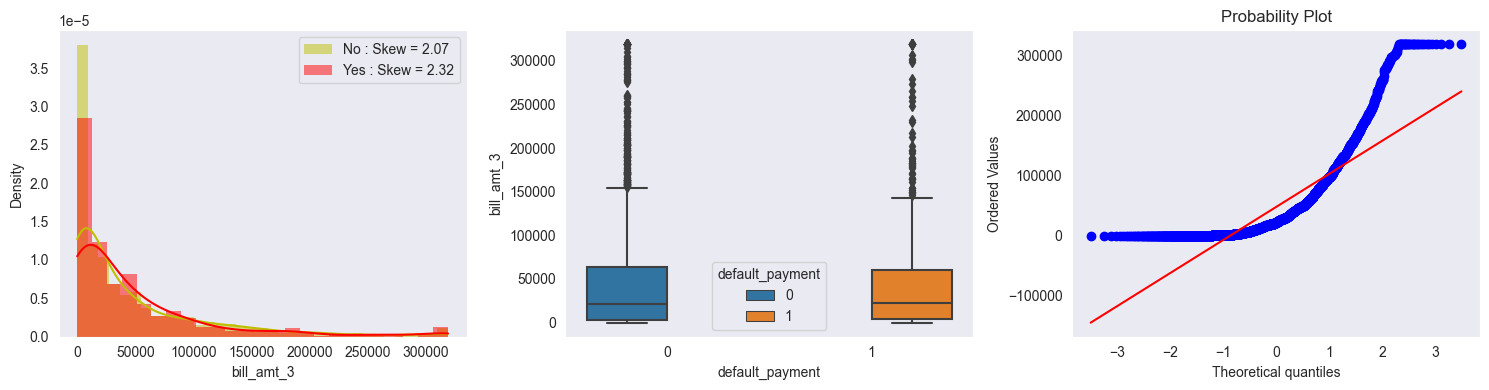

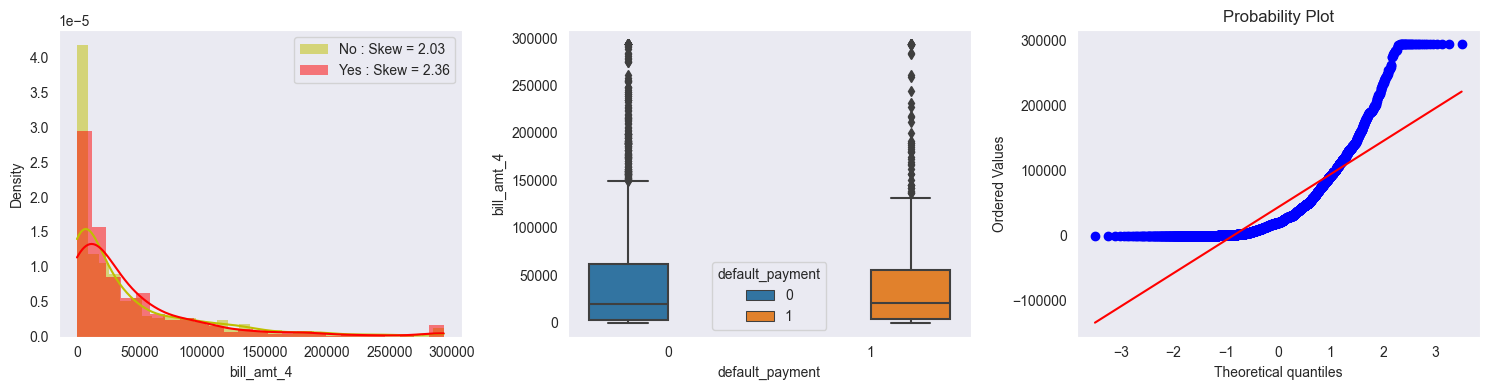

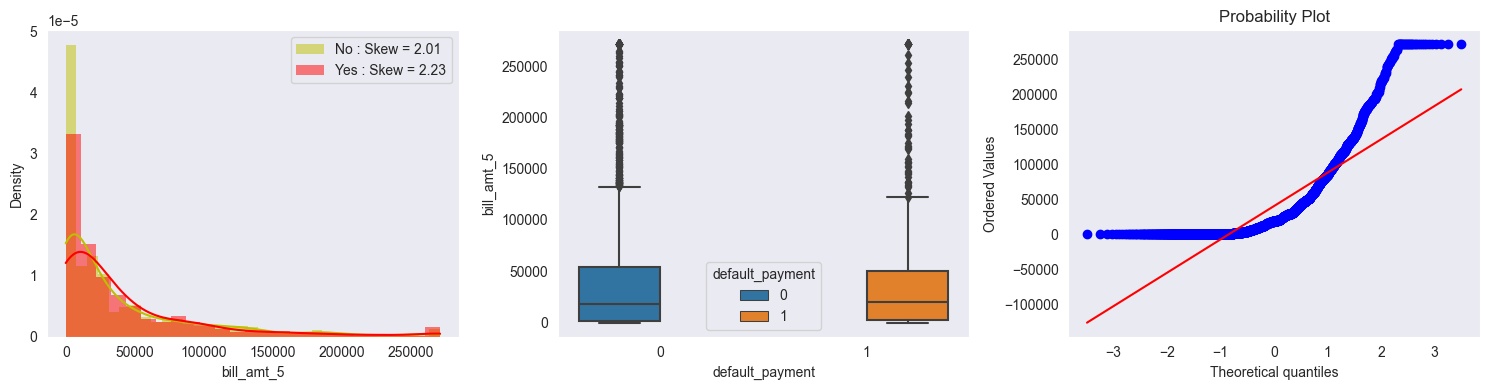

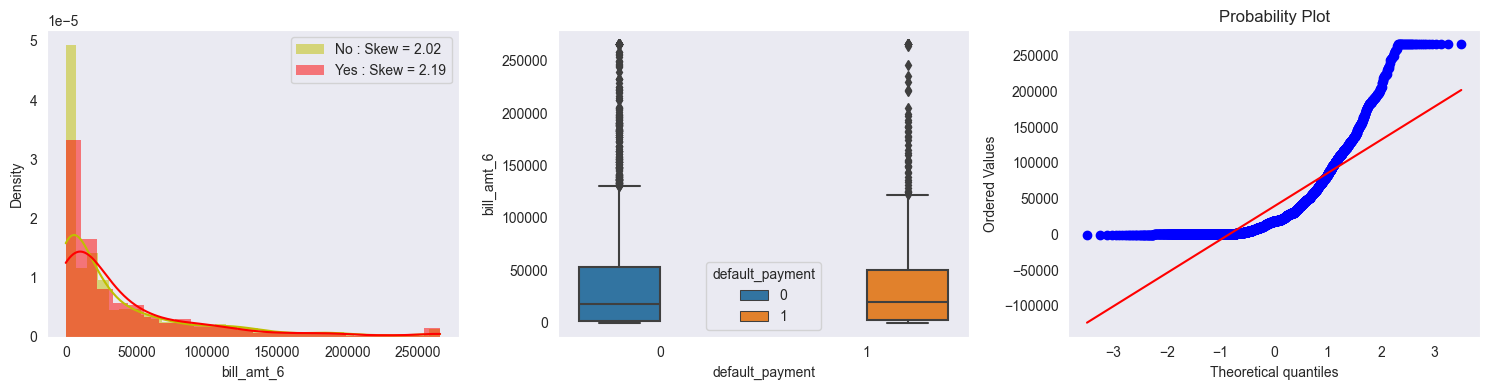

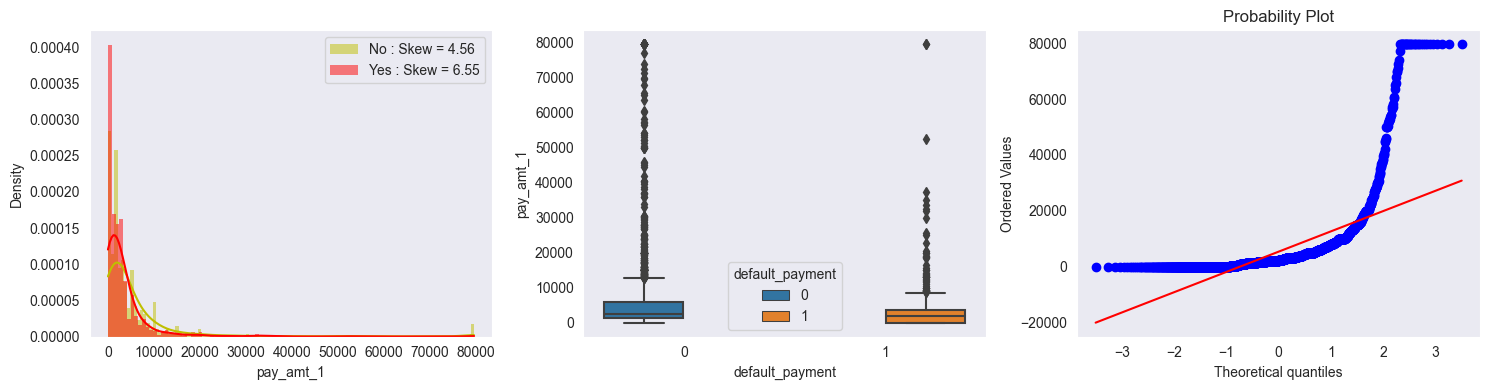

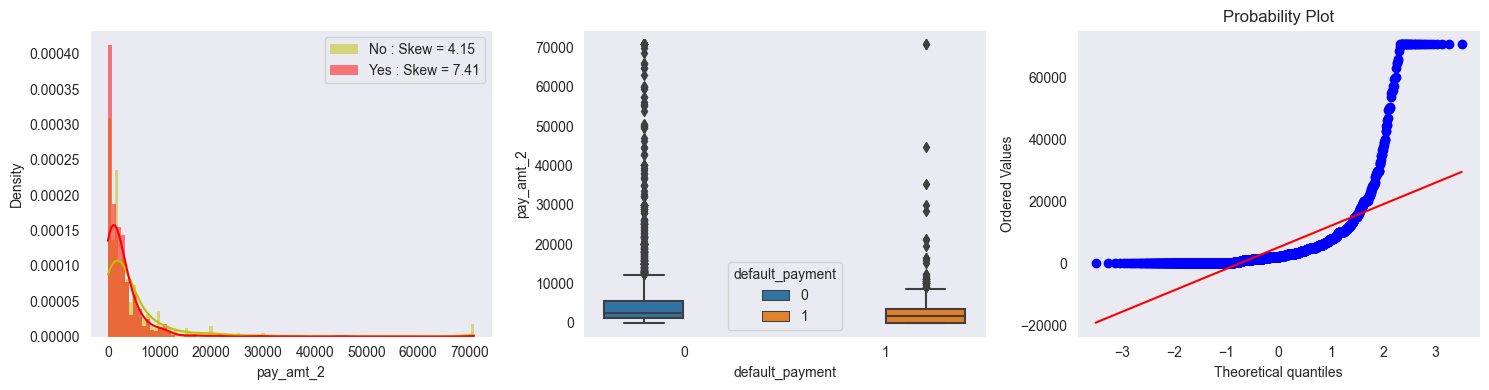

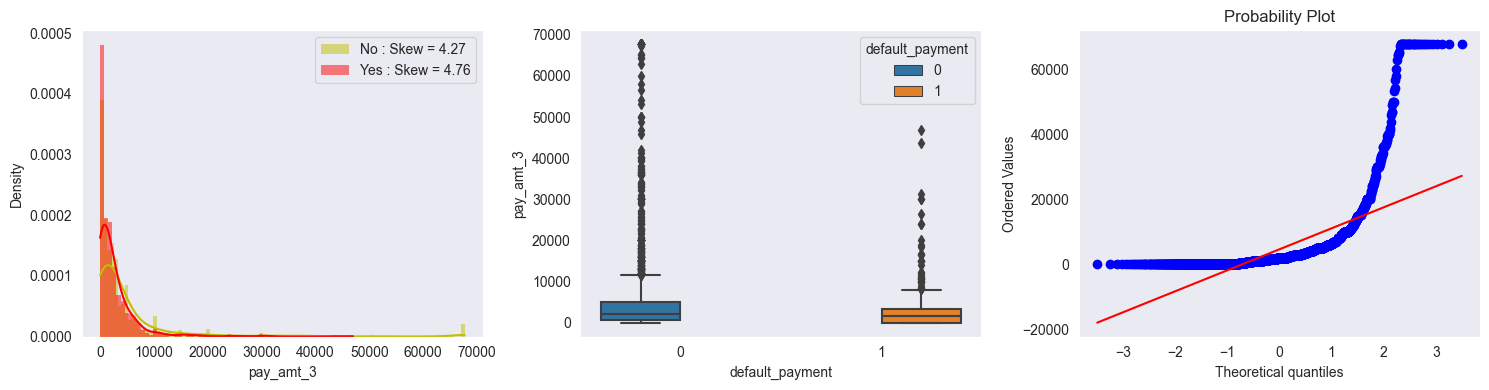

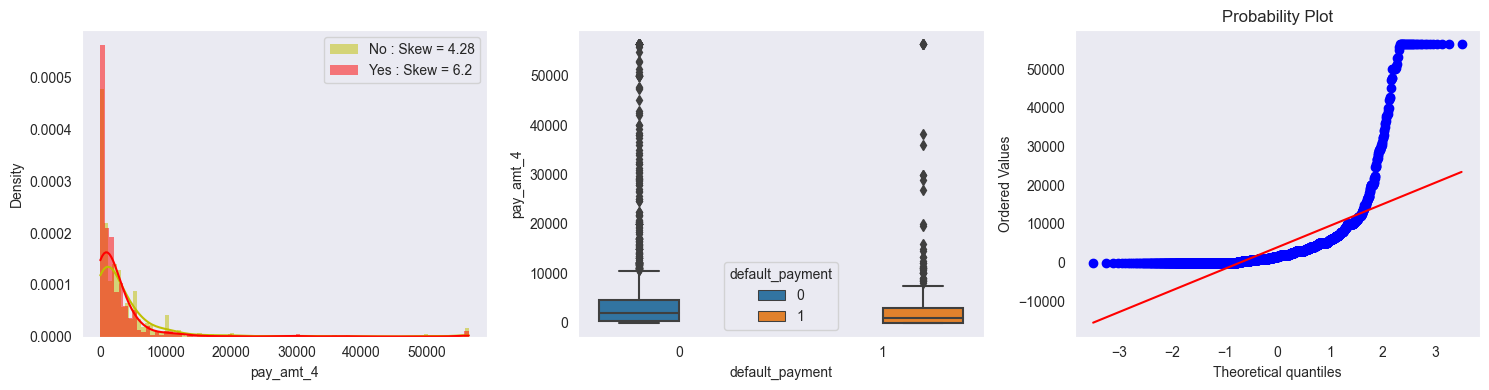

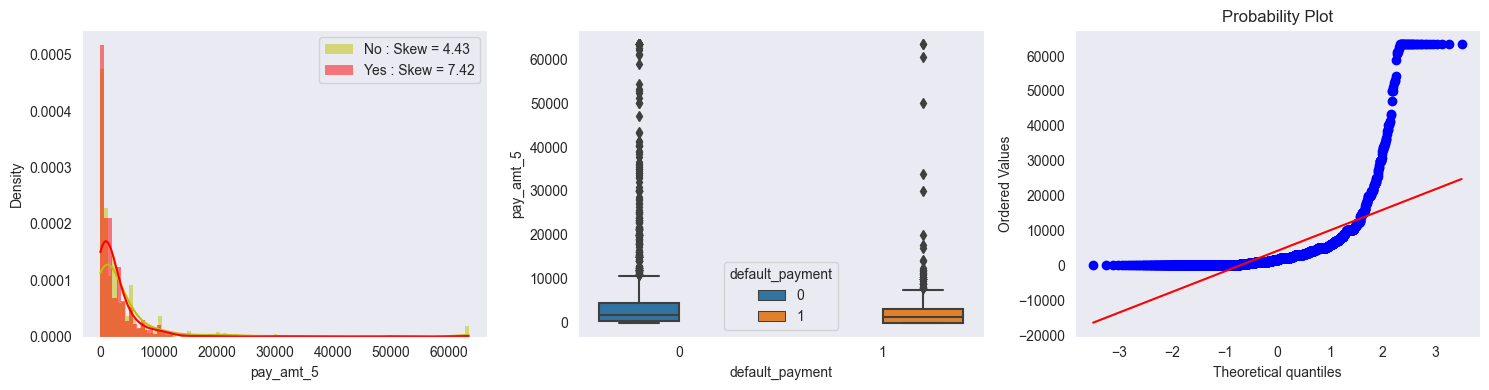

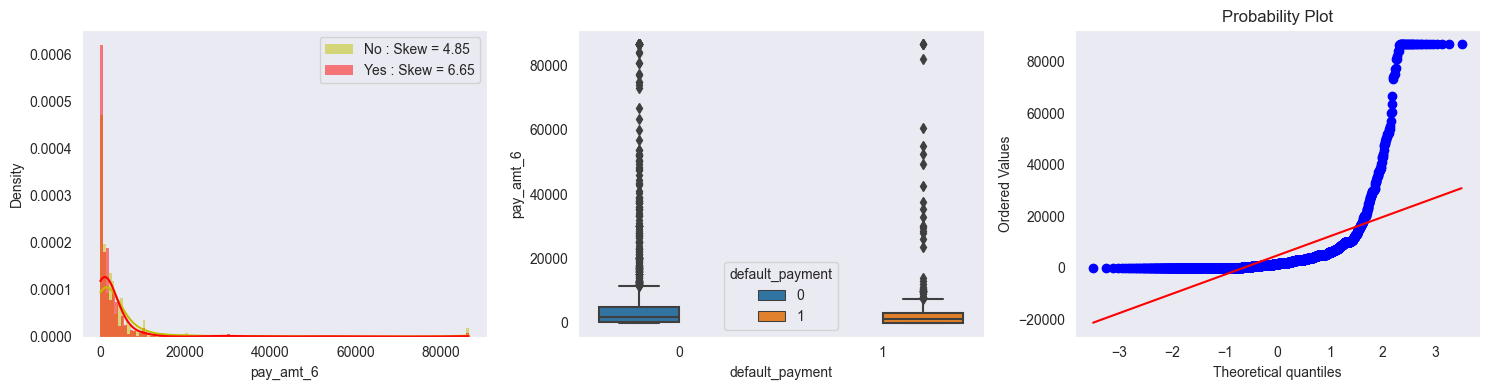

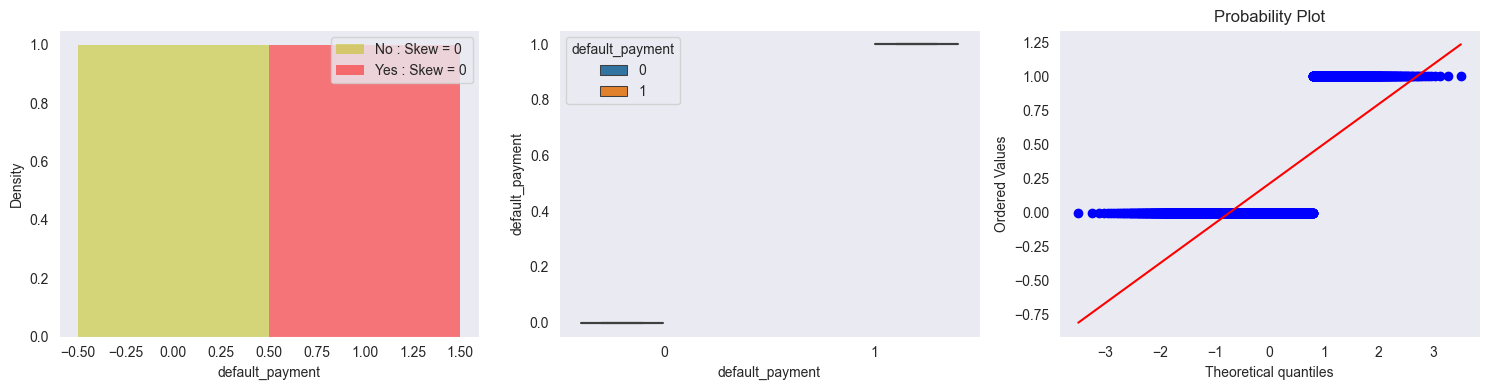

In [134]:
#Distribution of dataframe 
def visualize_data_distribution(data_data, features, targetName='default_payment', targetLabel=['No','Yes']):
    """
        Definition : Function for visualize diagram for all features
        Parameters : 
            * Features --> List of features
        Return : 0
    """
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_data[col][data_data[targetName]==0],
            label=targetLabel[0]+" :"+" Skew = " +
            str(np.round(data_data[col][data_data[targetName] == 0].skew(), 2)),
            kde=True,
            color='y',
            stat="density",
            linewidth=0
        )
        sns.histplot(
            data_data[col][data_data[targetName]==1],
            label=targetLabel[1]+" :"+" Skew = " +
            str(np.round(data_data[col][data_data[targetName] == 1].skew(), 2)),
            kde=True,
            color='r',
            stat="density",
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_data[targetName],
            y = data_data[col],
            hue = data_data[targetName])
        plt.subplot(133)
        stats.probplot(x=data_data[col], plot=plt)
        plt.tight_layout()
        plt.show()
        
visualize_data_distribution(data, data.columns.values)

Kita dapat melihat bahwa distribusi data hampir semuanya Skewed distribution dan terdapat banyak outlier pada beberapa kolom. 

# 5- Data Preprocessing

# Split Model Inference

In [20]:
#Get data for model inference
data_inf = data.sample(10, random_state=20)
data_inf


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
2498,110000,1,1,2,30,1,2,-1,-1,-1,...,1475,3102,3151,0,2373,1475,4000,3000,2373,0
1817,270000,2,2,1,35,-1,-1,-1,-1,-1,...,165,0,601,165,165,165,0,601,928,0
596,200000,1,2,1,37,-1,-1,-1,-1,-1,...,3960,6797,4414,4727,2526,3971,6827,4427,5603,0
735,130000,2,3,2,27,0,0,0,0,0,...,46659,47588,47698,5400,3941,1742,1671,1712,1730,0
2135,100000,2,3,2,46,-1,-1,-1,2,2,...,203,0,7856,0,203,0,0,7856,10000,0
2646,100000,2,2,1,29,0,0,0,2,2,...,84044,84532,80828,2700,8000,4304,3000,0,3000,1
14,400000,2,2,1,24,0,0,0,0,0,...,89128,39276,23440,5519,44776,1502,2026,1015,52100,0
1151,130000,2,2,2,24,0,0,0,0,-1,...,19057,2511,10358,10095,7005,6013,2511,10358,5000,0
1251,50000,1,2,2,39,1,2,2,2,2,...,37212,39319,36082,0,3000,0,3007,7,3119,0
1912,90000,2,1,2,28,0,0,2,2,2,...,91204,89687,91060,5800,5400,5804,0,6700,0,1


In [21]:
#Remove inference set from dataset
data_train_test= data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,50000,1,3,3,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,3,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


In [22]:
#Reset Index 
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,110000,1,1,2,30,1,2,-1,-1,-1,...,1475,3102,3151,0,2373,1475,4000,3000,2373,0
1,270000,2,2,1,35,-1,-1,-1,-1,-1,...,165,0,601,165,165,165,0,601,928,0
2,200000,1,2,1,37,-1,-1,-1,-1,-1,...,3960,6797,4414,4727,2526,3971,6827,4427,5603,0
3,130000,2,3,2,27,0,0,0,0,0,...,46659,47588,47698,5400,3941,1742,1671,1712,1730,0
4,100000,2,3,2,46,-1,-1,-1,2,2,...,203,0,7856,0,203,0,0,7856,10000,0
5,100000,2,2,1,29,0,0,0,2,2,...,84044,84532,80828,2700,8000,4304,3000,0,3000,1
6,400000,2,2,1,24,0,0,0,0,0,...,89128,39276,23440,5519,44776,1502,2026,1015,52100,0
7,130000,2,2,2,24,0,0,0,0,-1,...,19057,2511,10358,10095,7005,6013,2511,10358,5000,0
8,50000,1,2,2,39,1,2,2,2,2,...,37212,39319,36082,0,3000,0,3007,7,3119,0
9,90000,2,1,2,28,0,0,2,2,2,...,91204,89687,91060,5800,5400,5804,0,6700,0,1


# Handling Outlier 

karena terdapat outlier, sehingga dilakukan handling outlier dengan capping dengan batas atas 0.99 dan batas bawah 0.01. agar tidak kehilangan banyak data yang menyebabkan hilangnya informasi. 

In [23]:
#Handling Outlier
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x
data=data.apply(outlier_capping)

In [1]:
#check 
data.shape

NameError: name 'data' is not defined

# Split X (Features) and y (Target)

In [25]:
#Split X and y
X = data_train_test.drop(['default_payment'], axis=1)
y= data_train_test ['default_payment']
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,3,3,50,0,0,0,-1,-1,...,0,3400,2769,0,2266,0,3400,2769,1700,0
1,200000,2,3,3,45,-2,-2,-2,-2,-2,...,0,399,1396,0,2430,0,399,1396,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
3,230000,1,2,1,41,0,0,0,0,0,...,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
4,50000,1,2,1,42,0,0,0,0,0,...,30660,31320,36227,35569,2007,2000,1500,5400,0,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,0,700,860,0,0,0,700,860,2420
2951,20000,1,1,1,39,-1,-1,-1,-1,-1,...,596,630,664,598,700,600,700,700,600,1400
2952,20000,1,2,2,25,0,0,0,0,0,...,15564,16600,17025,17381,1300,1300,1300,700,630,650
2953,50000,1,2,2,38,0,0,0,0,0,...,17775,17833,18246,18642,1300,1600,650,700,700,700


pada splitting ini menggunakan parameter stratify untuk menjaga proporsi dari label

In [26]:
#Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)
print ('Train Size: ', X_train.shape)
print ('Test Size : ', X_test.shape)


Train Size:  (2068, 23)
Test Size :  (887, 23)


# Check Missing Value

In [27]:
#Check missing value
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64
limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64
0
0


tidak terdapat missing value pada semua kolom

# Split between Numerical Columns and Categorical Columns 

In [28]:
#Get Numerical Columns and Categorical Columns
cat_columns= X_train[['sex', 'education_level','marital_status']].columns.tolist()
num_columns= X_train.drop(['sex', 'education_level','marital_status'], axis=1).columns.tolist()

print ('Numerical Columns: ', num_columns)
print ('Categorical Columns: ', cat_columns)

Numerical Columns:  ['limit_balance', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns:  ['sex', 'education_level', 'marital_status']


In [29]:
#Split Train-Set and Test-Set based on Column Types
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2026,280000,31,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,219,0,0,82150,0,220,1124
540,40000,39,-1,-1,-1,0,0,0,500,0,18583,19353,19440,20279,0,18583,1460,547,1000,500
1491,140000,30,-1,-1,-1,-1,-1,-1,1750,1003,0,440,1367,890,1003,0,440,1367,890,0
1813,210000,48,-1,-1,-1,-1,-1,-1,1417,-3,355,12816,0,102,0,358,12816,0,102,210
29,20000,31,0,0,0,0,0,0,3769,4782,5797,6654,6786,7077,1239,1254,1111,243,400,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,30000,25,0,0,0,0,0,0,25366,27626,22034,16312,14614,0,5000,1000,326,292,0,0
2569,50000,57,0,0,-1,0,0,0,53320,52754,27231,26852,27820,25529,1300,50499,1000,1500,1500,1000
1753,90000,34,-2,-2,-2,-2,-2,-2,1905,1924,11855,665,0,665,1924,11855,10655,0,665,0
1531,180000,35,-1,-1,-1,0,-1,-1,11123,7883,16477,13207,73813,34935,7936,18207,0,22479,34935,5382


# Feature Scaling

menggunakan scaling features menggunakan MinMaxScaler() karena data terdistribusi tidak normal. 

In [30]:
#Scaling
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train_num)
X_test_scaled = sc.transform(X_test_num)

kolom kategori adalah biner, sehingga tidak perlu melakukan OneHot Encoding. 

# Concate between Numerical Columns and Categorical Columns

In [31]:
#Concate Columns
X_train_final = np.concatenate([X_train_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_cat], axis=1)
X_train_final

array([[0.34177215, 0.20833333, 0.        , ..., 1.        , 1.        ,
        2.        ],
       [0.03797468, 0.375     , 0.1       , ..., 2.        , 2.        ,
        1.        ],
       [0.16455696, 0.1875    , 0.1       , ..., 1.        , 1.        ,
        2.        ],
       ...,
       [0.10126582, 0.27083333, 0.        , ..., 2.        , 2.        ,
        1.        ],
       [0.21518987, 0.29166667, 0.1       , ..., 2.        , 1.        ,
        2.        ],
       [0.18987342, 0.14583333, 0.2       , ..., 1.        , 1.        ,
        2.        ]])

In [32]:
#Create Dataframe of `X_train_final`
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex,education_level,marital_status
0,0.341772,0.208333,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.021194,0.117976,...,0.145302,0.000000,0.000000,0.412381,0.000000,0.000567,0.002786,1.0,1.0,2.0
1,0.037975,0.375000,0.1,0.111111,0.125,0.2,0.222222,0.222222,0.022114,0.117978,...,0.184631,0.000000,0.015144,0.007329,0.003217,0.002577,0.001239,2.0,2.0,1.0
2,0.164557,0.187500,0.1,0.111111,0.125,0.1,0.111111,0.111111,0.024409,0.119731,...,0.146618,0.002033,0.000000,0.002209,0.008039,0.002293,0.000000,1.0,1.0,2.0
3,0.253165,0.562500,0.1,0.111111,0.125,0.1,0.111111,0.111111,0.023797,0.117973,...,0.145073,0.000000,0.000292,0.064334,0.000000,0.000263,0.000520,2.0,2.0,1.0
4,0.012658,0.208333,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.028115,0.126333,...,0.158748,0.002511,0.001022,0.005577,0.001429,0.001031,0.000625,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0.025316,0.083333,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.067766,0.166245,...,0.144873,0.010135,0.000815,0.001636,0.001717,0.000000,0.000000,2.0,3.0,2.0
2064,0.050633,0.750000,0.2,0.222222,0.125,0.2,0.222222,0.222222,0.119087,0.210147,...,0.194923,0.002635,0.041154,0.005020,0.008822,0.003865,0.002478,1.0,2.0,1.0
2065,0.101266,0.270833,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.024693,0.121340,...,0.146177,0.003900,0.009661,0.053487,0.000000,0.001714,0.000000,2.0,2.0,1.0
2066,0.215190,0.291667,0.1,0.111111,0.125,0.2,0.111111,0.111111,0.041617,0.131751,...,0.213364,0.016086,0.014838,0.000000,0.132199,0.090022,0.013338,2.0,1.0,2.0


In [33]:
#Create Dataframe of `X_test_final`
X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns + cat_columns])
X_test_final_df

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex,education_level,marital_status
0,0.253165,0.187500,0.3,0.444444,0.250,0.2,0.222222,0.222222,0.156875,0.244040,...,0.298978,0.000000,0.002179,0.013488,0.017643,0.007731,0.007435,2.0,1.0,2.0
1,0.620253,0.708333,0.4,0.222222,0.250,0.2,0.222222,0.222222,1.148192,1.013439,...,0.324030,0.075604,0.008964,0.022589,0.023524,0.010307,0.247831,1.0,3.0,1.0
2,0.177215,0.312500,0.2,0.222222,0.250,0.2,0.222222,0.111111,0.229330,0.240281,...,0.148820,0.004771,0.002037,0.006024,0.015396,0.005187,0.011708,2.0,2.0,1.0
3,0.341772,0.416667,0.1,0.111111,0.125,0.1,0.111111,0.111111,0.027658,0.123412,...,0.164278,0.006304,0.002598,0.021028,0.060433,0.025506,0.004191,1.0,2.0,1.0
4,0.025316,0.020833,0.3,0.444444,0.250,0.2,0.222222,0.222222,0.051578,0.147828,...,0.161457,0.003040,0.001138,0.010040,0.001047,0.005154,0.004957,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0.101266,0.083333,0.4,0.222222,0.250,0.2,0.222222,0.111111,0.176716,0.270564,...,0.289105,0.008108,0.002655,0.005020,0.000000,0.199706,0.000000,2.0,1.0,2.0
883,0.240506,0.354167,0.2,0.222222,0.250,0.0,0.000000,0.000000,0.034781,0.122996,...,0.139737,0.002037,0.000179,0.011982,0.000000,0.000000,0.008377,1.0,2.0,1.0
884,0.253165,0.333333,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.096523,0.188074,...,0.279906,0.006105,0.012277,0.150606,0.029540,0.005538,0.007537,1.0,2.0,1.0
885,0.240506,0.291667,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.072205,0.177166,...,0.190685,0.020269,0.008149,0.010040,0.029405,0.012884,0.002478,1.0,2.0,2.0


# Feature Selection with Chi-Squared


In [34]:
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train_final, y_train)
fit.scores_

array([5.84271043e+00, 1.02052907e-02, 1.43826478e+01, 1.36347198e+01,
       1.20948001e+01, 8.08340626e+00, 9.61401586e+00, 8.17515638e+00,
       2.53961005e-02, 9.99832706e-05, 4.14552786e-03, 3.08908702e-05,
       1.50173337e-02, 2.35888812e-02, 1.15727592e+00, 7.51163121e-01,
       3.08514337e+00, 1.73518241e+00, 8.44062881e-01, 1.43948378e+00,
       3.06186631e-01, 8.79275390e-01, 4.40995070e-02])

In [35]:
np.round_(fit.scores_)

array([ 6.,  0., 14., 14., 12.,  8., 10.,  8.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  3.,  2.,  1.,  1.,  0.,  1.,  0.])

semakin tinggi nilai chi-squared maka semakin signifikan pengaruh fitur tersebut dengan target. 

In [36]:
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)


education_level    14.382648
marital_status     13.634720
age                12.094800
pay_2               9.614016
pay_3               8.175156
pay_1               8.083406
limit_balance       5.842710
bill_amt_6          3.085143
pay_amt_1           1.735182
pay_amt_3           1.439484
bill_amt_4          1.157276
pay_amt_5           0.879275
pay_amt_2           0.844063
bill_amt_5          0.751163
pay_amt_4           0.306187
pay_amt_6           0.044100
pay_4               0.025396
bill_amt_3          0.023589
bill_amt_2          0.015017
sex                 0.010205
pay_6               0.004146
pay_5               0.000100
bill_amt_1          0.000031
dtype: float64

berdasarkan data diatas, yang paling tidak berpengaruh terhadap default payment adalah bill_amt_3, bill_amt_2, sex, pay_6, pay_5, dan bill_amt_1. sehingga, dihapus dari dataset. 

In [37]:
#Features Selection
X_train_final_df= X_train_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)
X_test_final_df= X_test_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)

print(X_train_final_df.shape)
print(X_test_final_df.shape)

(2068, 17)
(887, 17)


/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_1532/1207909948.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train_final_df= X_train_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)
/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_1532/1207909948.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test_final_df= X_test_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)


# 6 - Model Definition

# Algoritma 

menggunakan model Logistic Regression karena algoritma ini mengklasifikasi untuk mencari hubungan antara features dengan probabilitas hasil output tertentu.

- kelebihan : logistic regression tidak membutuhkan hubungan linear antara variabel dependen dan variabel independen, tidak memerlukan uji asumsi klasik.
- kelemahan : rentang terhadap undefitting pada dataset yang kelasnya tidak seimbang, sehingga akan menghasilkan akurasi yang rendah.
logistic regression ini dapat membuat perbedaan positif dalam bisnis, karena membantu memahami hubungan dan memprediksi hasil, sehingga dapat bertindak untuk meningkatkan pengambilan keputusan.

menggunakan model SVM karena klasifikasi SVM memiliki akurasi tinggi dan bekerja dengan baik dengan ruang dimensi tinggi, dan merupakan suatu teknik untuk menemukan hyperplane yang bisa memisahkan dua set dari dua kelas yang berbeda.
- Kelebihan : Pengklasifikasi SVM menawarkan akurasi tinggi dan bekerja dengan baik dengan ruang dimensi tinggi. SVM pengklasifikasi pada dasarnya menggunakan subset dari poin pelatihan sehingga hasilnya menggunakan memori yang sangat sedikit.

- Kelemahan : SVM memiliki waktu pelatihan yang tinggi sehingga dalam praktiknya tidak cocok untuk kumpulan data yang besar. Pengklasifikasi SVM tidak berfungsi dengan baik dengan kelas yang tumpang tindih.

menggunakan Decision Tree karena biasanya meniru kemampuan berpikir manusia saat membuat keputusan, sehingga mudah dimengerti, dan logika dibalik decision tree dapat dengan mudah dipahami karena menunjukkan struktur seperti pohon.
- kelebihan : dapat menyelesaikan masalah non-linear, dapat bekerja dengan data dimensi tinggi dengan akurasi yang sangat baik, mudah divisualisasikan dan dijelaskan.
- kelemahan : tumpang tindih yang terjadi terutama ketika sangat banyak kelas dan kriteria yang digunakan, kesulitan dalam merancang pohon keputusan yang optimal, perhitungan jumlah kesalahan dari setiap lebel dalam pohon keputusan lumayan besar.

menggunakan Random Forest karena mampu mengklasifikasi data yang memiliki atribut yang tidak lengkap, dan dapat menangani data sampel yang banyak
- kelebihan : dapat mengatasi noise dan missing valur serta dapat mengatasi data dalam jumlah besar
- kelemahan : interpretasi yang sulit dan membutuhkan tuning model yang tepat untuk data

menggunakan KNN karena dapat melakukan klasifikasi dengan tepat karena garis keputusan kelasnya non-linear. 
- kelebihan : sangat mudah diterapkan dan dipahami, dapat membuat prediksi tanpa training,
- kelemahan : sangat lambat seiring dengan bertambahnya ukuran data yang digunakan, memilih nilai K yang benar

menggunakan Naive Bayes karena paling populer digunakan dengan tingkat keakuratan yang baik.
- kelebihan : mudah untuk diimplementasikan, hanya membutuhkan jumlah data train yang kecil
- kelemahan : estimasi dapat salah pada beberapa kasus, probabilitas nol, Zero Frequency

menggunakan Boosting model XGB Classifier karena dapat mengolah data yang tidak seimbang.
- Kelebihan: dapat melakukan pemrosesan paralel yang dapat mempercepat komputasi, memiliki fleksibilitas pengaturan objektif yang tinggi, dan dapat mengatasi split saat negatif loss. 
- kelemahan : penentuan nilai setiap parameter tergolong sulit mengakibatkan hasil yang diperoleh terjebak pada situasi local optimum. 

# Hyperparameter

menggunakan hyperparamater tuning Grid Search CV karena mempermudah dalam menguji coba setiap model dan parameter model tanpa harus mencoba melakukan validasi secara manual satu per satu. Grid Search dapat diterapkan secara maksimum, apabila batas atas dan batas bawah dari masing masing parameter diketahui

Selain itu, menggunakan hyperparameter tuning Random Search karena tidak menguji semua parameter, pancarian dilakukan secara acak, sehingga memungkinakan kita untuk menentukan jumlah nilai parameter yang ingin kita uji. 

# Metriks

metriks yang dipakai adalah confusion matrix dan classification report untuk evaluasi model.
karena menunjukkan bagaimana model ketika membuat prediksi. selain itu, tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model, namun juga jenis kesalahan yang dibuat. setiap kolom dari confusion matrix mempresentasikan instance dari kelas prediksi.



# Model Definition
- Logistic Regression 
log_reg_model = LogisticRegression()
- SVM 
svc_model = SVC()
- Decision Tree 
dec_model = DecisionTreeClassifier()
- Random Forest 
rf_model = RandomForestClassifier()
- KNN
knn_model = KNeighborsClassifier()
- Naive Bayes 
nb_model = GaussianNB()
- XGB Classifier
xgb_model = XGBClassifier()


# 7 - Model Training 

In [38]:
# Training using Logistic Regression
log_reg_model= LogisticRegression()
log_reg_model.fit(X_train_final_df, y_train)

LogisticRegression()

In [39]:
#Training using SVM
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train_final_df, y_train)

SVC()

In [40]:
#Training using Decision Tree
dec_model = DecisionTreeClassifier(random_state=24)
dec_model.fit(X_train_final_df, y_train)

DecisionTreeClassifier(random_state=24)

In [41]:
#Training using Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_final_df, y_train)

RandomForestClassifier()

In [42]:
#Training using KNN
knn_model =  KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train_final_df, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
#Training using Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_final_df, y_train)

GaussianNB()

In [44]:
#Training using Boosting model XGB Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_final_df, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

# 8 - Model Evaluation

# Logistic Regression

F1 Score - Train Set  :  0.2990990990990991 

Accuracy - Train Set  :  0.8118955512572534 

ROC-AUC - Train Set  :  0.5847563813162008 

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1625
           1       0.74      0.19      0.30       443

    accuracy                           0.81      2068
   macro avg       0.78      0.58      0.60      2068
weighted avg       0.80      0.81      0.76      2068
 

Confusion Matrix      : 


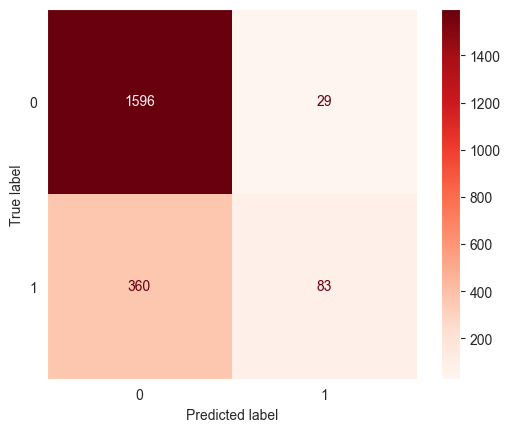

In [45]:
# Check Performance Model against Train-Set
logreg_pred_train = log_reg_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, logreg_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, logreg_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, logreg_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, logreg_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.3824701195219124 

Accuracy - Test Set  :  0.8252536640360767 

ROC-AUC - Test Set  :  0.616990107981575 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       697
           1       0.79      0.25      0.38       190

    accuracy                           0.83       887
   macro avg       0.81      0.62      0.64       887
weighted avg       0.82      0.83      0.79       887
 

Confusion Matrix      : 


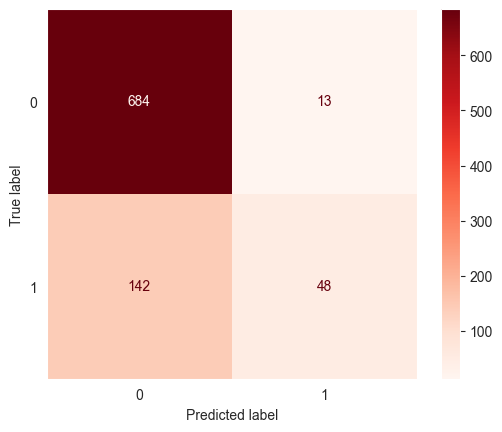

In [46]:
# Check Performance Model against Test-Set
logreg_pred_test = log_reg_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, logreg_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, logreg_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, logreg_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, logreg_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_final_df, y_test, cmap='Reds'))

Logistic Regression mengalami sedikit underfitting karena test set lebih besar daripada train set.
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 79%, 21% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 25%, 75% salah prediksi. 

precision tinggi dan recall rendah yang berarti model tidak dapat mendeteksi kelas dengan baik tetapi sangat dapat dipercaya ketika itu terjadi. 

# SVM 

F1 Score - Train Set  :  0.08085106382978724 

Accuracy - Train Set  :  0.7911025145067698 

ROC-AUC - Train Set  :  0.5189831567980553 

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      1625
           1       0.70      0.04      0.08       443

    accuracy                           0.79      2068
   macro avg       0.75      0.52      0.48      2068
weighted avg       0.77      0.79      0.71      2068
 

Confusion Matrix      : 


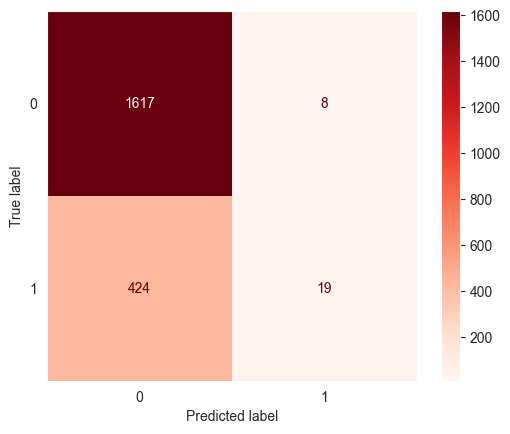

In [47]:
# Check Performance Model against Train-Set

svc_pred_train = svc_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, svc_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, svc_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, svc_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, svc_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.16267942583732056 

Accuracy - Test Set  :  0.8027057497181511 

ROC-AUC - Test Set  :  0.5433021218757079 

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       697
           1       0.89      0.09      0.16       190

    accuracy                           0.80       887
   macro avg       0.85      0.54      0.53       887
weighted avg       0.82      0.80      0.73       887
 

Confusion Matrix      : 


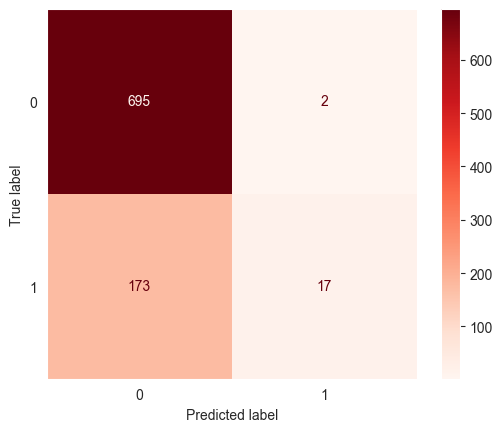

In [48]:
# Check Performance Model against Test-Set

svc_pred_test = svc_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, svc_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, svc_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, svc_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, svc_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_model, X_test_final_df, y_test, cmap='Reds'))

SVC dalam kategori goodfit karena kurang lebih hampir sama antara train set score dan test set score. 
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 89%, 11% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 9%, 91% salah prediksi. 

precision tinggi dan recall rendah yang berarti model tidak dapat mendeteksi kelas dengan baik tetapi sangat dapat dipercaya ketika itu terjadi. 

# Random Forest

F1 Score - Train Set  :  1.0 

Accuracy - Train Set  :  1.0 

ROC-AUC - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       443

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068
 

Confusion Matrix      : 


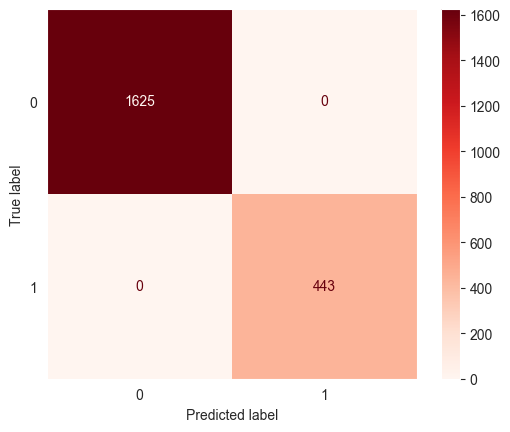

In [49]:
# Check Performance Model against Train-Set

rf_pred_train = rf_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, rf_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, rf_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, rf_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, rf_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.5068493150684932 

Accuracy - Test Set  :  0.8376550169109357 

ROC-AUC - Test Set  :  0.6746507588914897 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       697
           1       0.73      0.39      0.51       190

    accuracy                           0.84       887
   macro avg       0.79      0.67      0.70       887
weighted avg       0.83      0.84      0.82       887
 

Confusion Matrix      : 


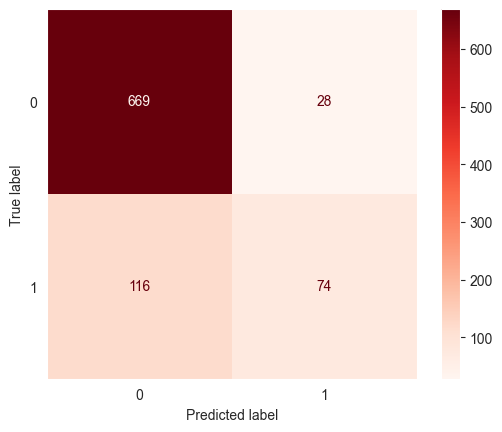

In [50]:
# Check Performance Model against Test-Set
rf_pred_test = rf_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, rf_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, rf_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, rf_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, rf_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_model, X_test_final_df, y_test, cmap='Reds'))

Random Forest mengalami overfitting karena train set lebih besar daripada test set.
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 68%, 32% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 38%, 62% salah prediksi. 

precision tinggi dan recall rendah yang berarti model tidak dapat mendeteksi kelas dengan baik tetapi sangat dapat dipercaya ketika itu terjadi. 

# Decision Tree

F1 Score - Train Set  :  1.0 

Accuracy - Train Set  :  1.0 

ROC-AUC - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       443

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068
 

Confusion Matrix      : 


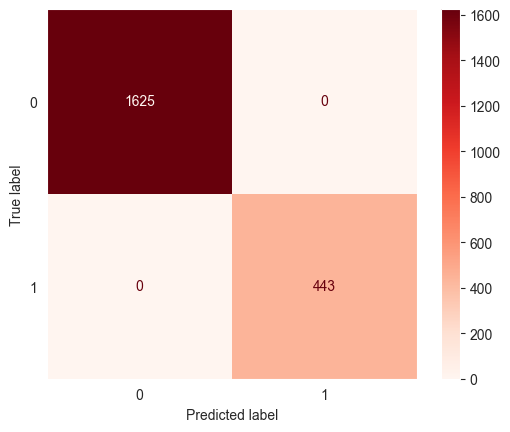

In [51]:
# Check Performance Model against Train-Set

dec_pred_train = dec_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, dec_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, dec_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, dec_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, dec_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dec_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.37333333333333335 

Accuracy - Test Set  :  0.7350620067643743 

ROC-AUC - Test Set  :  0.6017141131163634 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       697
           1       0.38      0.37      0.37       190

    accuracy                           0.74       887
   macro avg       0.60      0.60      0.60       887
weighted avg       0.73      0.74      0.73       887
 

Confusion Matrix      : 


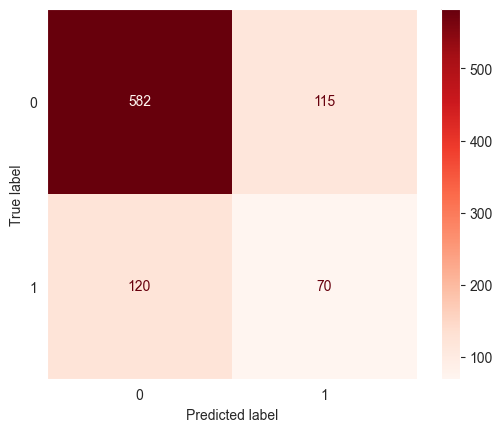

In [52]:
# Check Performance Model against Test-Set
dec_pred_test = dec_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, dec_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, dec_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, dec_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, dec_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dec_model, X_test_final_df, y_test, cmap='Reds'))

Decision Tree dalam kategori Overfitting karena train set lebih tinggi daripada test set. 
pada kolom train tidak ada yang salah prediksi. 100% benar.
sedangkan, yang kolom test set, 
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 38%, 62% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 37%, 63% salah prediksi. 

presisi rendah dan recall rendah, berarti bahwa kelas 1 ditangani dengan buruk oleh model.

# KNN 

In [53]:
scores = []
for k in range(1,10):
    knn_model = KNeighborsClassifier(k).fit(X_train_final_df, y_train)
    scores.append(knn_model.score(X_train_final_df, y_train))
print(scores, end = ' ')

[1.0, 0.8636363636363636, 0.8650870406189555, 0.8438104448742747, 0.8433268858800773, 0.8351063829787234, 0.8351063829787234, 0.8302707930367504, 0.8312379110251451] 

seperti yang dapat kita liat, kita mendapatkan akurasi tertinggi untuk k=1, tetapi kita tidak mengambil nilai k sebagai 1 karena ada kemungkinan untuk mendapatkan nilai yang salah. oleh karena itu, kami mengambil nilai tertinggi kedua yaitu k=3 yaitu dengan score sebesar 0.865 atau 86,5%.  

F1 Score - Train Set  :  0.46390168970814133 

Accuracy - Train Set  :  0.8312379110251451 

ROC-AUC - Train Set  :  0.6528904323667303 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1625
           1       0.73      0.34      0.46       443

    accuracy                           0.83      2068
   macro avg       0.78      0.65      0.68      2068
weighted avg       0.82      0.83      0.81      2068
 

Confusion Matrix      : 


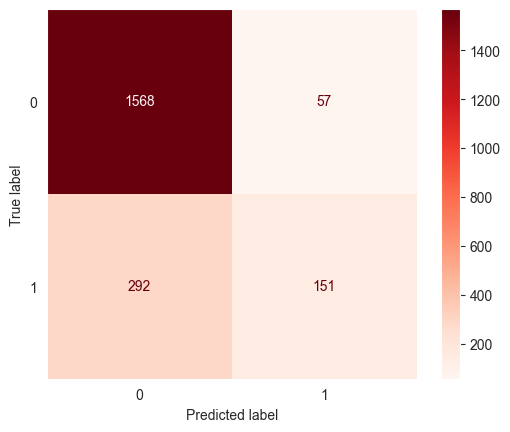

In [54]:
# Check Performance Model against Train-Set

knn_pred_train = knn_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, knn_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, knn_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, knn_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, knn_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.44522968197879853 

Accuracy - Test Set  :  0.8229988726042841 

ROC-AUC - Test Set  :  0.6442686702408819 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       697
           1       0.68      0.33      0.45       190

    accuracy                           0.82       887
   macro avg       0.76      0.64      0.67       887
weighted avg       0.81      0.82      0.80       887
 

Confusion Matrix      : 


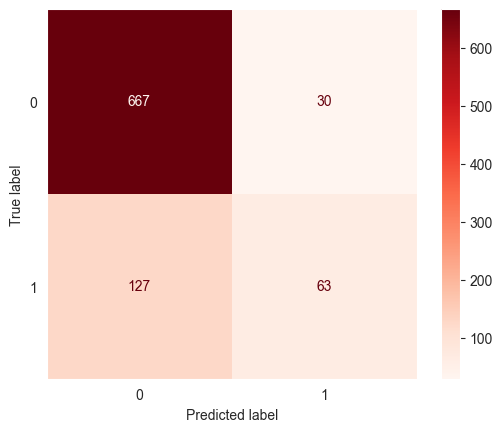

In [55]:
# Check Performance Model against Test-Set
knn_pred_test = knn_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, knn_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, knn_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, knn_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, knn_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_model, X_test_final_df, y_test, cmap='Reds'))

KNN mengalami sedikit overfitting karena train set lebih besar daripada test set.
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 68%, 32% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 33%, 67% salah prediksi. 

precision tinggi dan recall rendah yang berarti model tidak dapat mendeteksi kelas dengan baik tetapi sangat dapat dipercaya ketika itu terjadi. 

# Naive Bayes

F1 Score - Train Set  :  0.3851286939942803 

Accuracy - Train Set  :  0.37620889748549324 

ROC-AUC - Train Set  :  0.5710588643861781 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.23      0.37      1625
           1       0.24      0.91      0.39       443

    accuracy                           0.38      2068
   macro avg       0.57      0.57      0.38      2068
weighted avg       0.76      0.38      0.37      2068
 

Confusion Matrix      : 


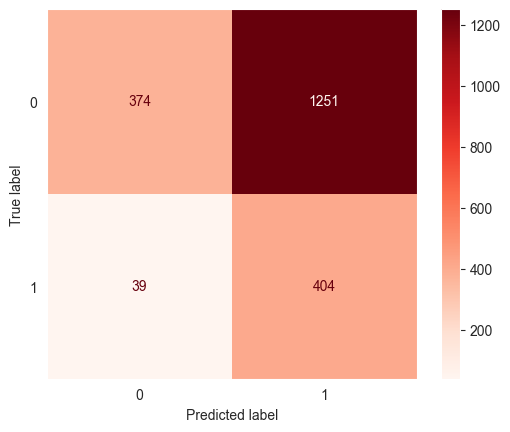

In [56]:
# Check Performance Model against Train-Set

nb_pred_train = nb_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, nb_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, nb_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, nb_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, nb_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.3890784982935153 

Accuracy - Test Set  :  0.3945885005636979 

ROC-AUC - Test Set  :  0.5784074605451937 

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.26      0.40       697
           1       0.25      0.90      0.39       190

    accuracy                           0.39       887
   macro avg       0.58      0.58      0.39       887
weighted avg       0.76      0.39      0.40       887
 

Confusion Matrix      : 


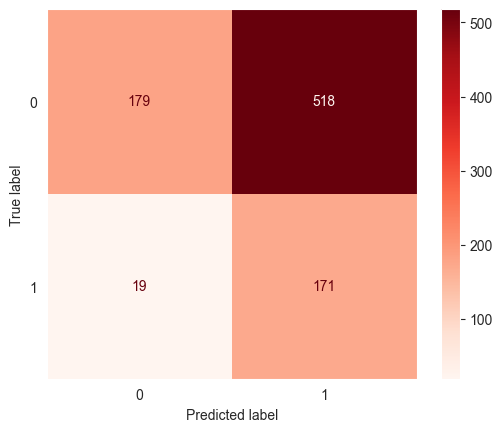

In [57]:
# Check Performance Model against Test-Set
nb_pred_test = nb_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, nb_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, nb_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, nb_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, nb_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_model, X_test_final_df, y_test, cmap='Reds'))

Naive Bayes mengalami underfitting karena test set lebih besar daripada train set. 
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 25%, 75% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 90%, 10% salah prediksi. 

presisi rendah, recall tinggi, berarti maka kelas 1 terdeteksi dengan baik tetapi model juga menyertakan kelas lain di dalamnya. 

# Boosting model XGB Classifier

F1 Score - Train Set  :  0.9966024915062288 

Accuracy - Train Set  :  0.9985493230174082 

ROC-AUC - Train Set  :  0.9966139954853273 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      0.99      1.00       443

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068
 

Confusion Matrix      : 


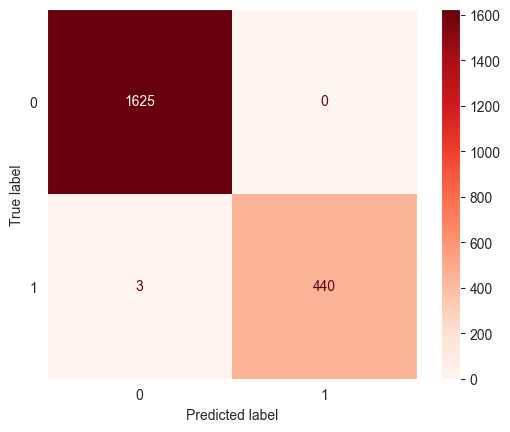

In [58]:
# Check Performance Model against Train-Set

xgb_pred_train = xgb_model.predict(X_train_final_df)

print('F1 Score - Train Set  : ', f1_score(y_train, xgb_pred_train), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, xgb_pred_train), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, xgb_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, xgb_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_model, X_train_final_df, y_train, cmap='Reds'))

F1 Score - Test Set   :  0.4655737704918032 

Accuracy - Test Set  :  0.8162344983089064 

ROC-AUC - Test Set  :  0.6552782602129427 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       697
           1       0.62      0.37      0.47       190

    accuracy                           0.82       887
   macro avg       0.73      0.66      0.68       887
weighted avg       0.80      0.82      0.80       887
 

Confusion Matrix      : 


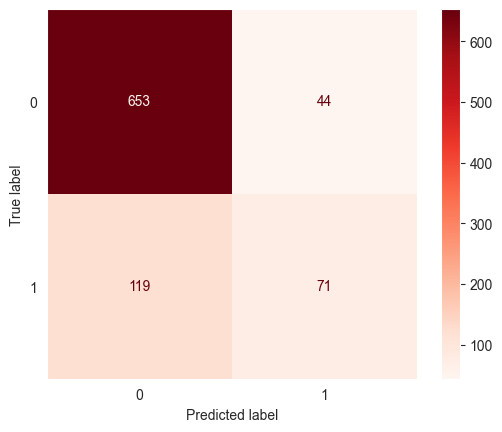

In [59]:
# Check Performance Model against Test-Set
xgb_pred_test = xgb_model.predict(X_test_final_df)

print('F1 Score - Test Set   : ', f1_score(y_test, xgb_pred_test), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, xgb_pred_test), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, xgb_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, xgb_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_final_df, y_test, cmap='Reds'))

- XGB Classifier mengalami overfitting arena train set lebih besar daripada test set.
pada train set hampir 100% terprediksi dengan benar, hanya ada 3 data yang terprediksi tidak benar. sedangkan, pada test set, 
precision pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 62%, 38% salah prediksi. 
recall pada kelas 1 berhasil memprediksi nasabah yang akan default untuk bulan depan dengan benar 37%, 63% salah prediksi. 

precision tinggi dan recall rendah yang berarti model tidak dapat mendeteksi kelas dengan baik tetapi sangat dapat dipercaya ketika itu terjadi. 

In [60]:
lr0=accuracy_score(logreg_pred_test, y_test)*100
svc0= accuracy_score(svc_pred_test, y_test)*100
knn0=accuracy_score(knn_pred_test, y_test)*100
dec0=accuracy_score(dec_pred_test, y_test)*100
rf0=accuracy_score(rf_pred_test, y_test)*100
nb0=accuracy_score(nb_pred_test, y_test)*100
xgb0 = nb=accuracy_score(xgb_pred_test, y_test)*100

lr1=accuracy_score(logreg_pred_train, y_train)*100
svc1= accuracy_score(svc_pred_train, y_train)*100
knn1=accuracy_score(knn_pred_train, y_train)*100
dec1=accuracy_score(dec_pred_train, y_train)*100
rf1=accuracy_score(rf_pred_train, y_train)*100
nb1=accuracy_score(nb_pred_train, y_train)*100
xgb1 = nb=accuracy_score(xgb_pred_train, y_train)*100

In [61]:
dict_train={"Logistic Regression":lr1, "SVC": svc1, "KNN":knn1, "Decision Tree":dec1, "Random Forest":rf1, "Naive Bayes":nb1, "XGB Classifier":xgb1}
dict_test={"Logistic Regression":lr0, "SVC": svc0, "KNN":knn0, "Decision Tree":dec0, "Random Forest":rf0, "Naive Bayes":nb0, "XGB Classifier":xgb0}

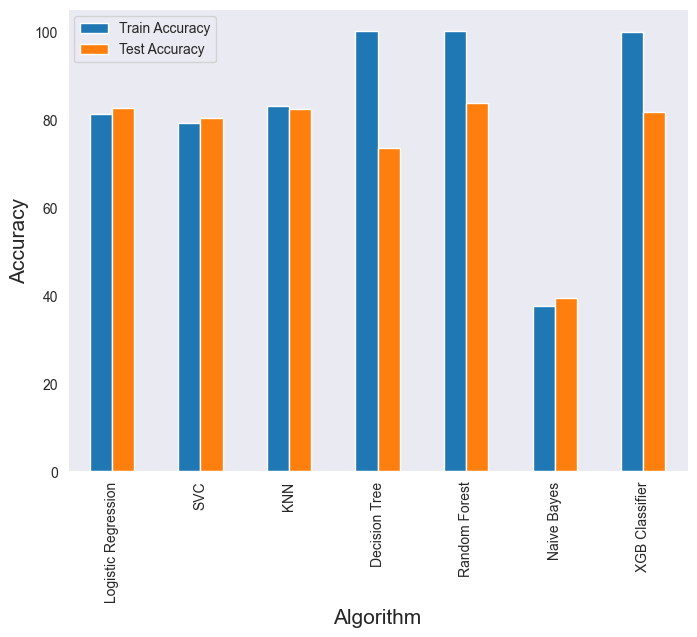

In [62]:
plot1=pd.DataFrame([dict_train,dict_test], index=['Train Accuracy','Test Accuracy']).transpose()

plot1.plot(kind='bar',figsize=(8,6))
plt.xlabel("Algorithm",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.show()

berdasarkan 7 model yang sudah dibuat: 
- Logistic Regression mengalami sedikit underfitting karena test set lebih besar daripada train set
- SVC dalam kategori sedikit underfitting karena test set lebih besar daripada train set.
- KNN mengalami sedikit overfitting karena train set lebih besar daripada test set.
- Decision Tree dalam kategori overfitting karena train set lebih besar daripada test set.
- Random Forest mengalami overfitting karena train set lebih besar daripada test set.
- Naive Bayes mengalami underfitting karena test set lebih besar daripada train set. 
- XGB Classifier mengalami overfitting arena train set lebih besar daripada test set.


sehingga algoritma terbaik adalah Random Forest dengan Accuracy Test Set tertinggi sebesar 0.84 atau 84% dan F1 Score average tertinggi. 

In [63]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes','XGB Classifier']
f1_score_train = [f1_score(y_train, logreg_pred_train), f1_score(y_train, svc_pred_train),f1_score(y_train, rf_pred_train),f1_score(y_train, dec_pred_train),f1_score(y_train, knn_pred_train),
f1_score(y_train, nb_pred_train),f1_score(y_train, xgb_pred_train)]
f1_score_test = [f1_score(y_test, logreg_pred_test), f1_score(y_test, svc_pred_test),f1_score(y_test, rf_pred_test), f1_score(y_test, dec_pred_test),f1_score(y_test, knn_pred_test),
f1_score(y_test, nb_pred_test),f1_score(y_test, xgb_pred_test)]
ROC_AUC_score = [roc_auc_score(y_test,logreg_pred_test), roc_auc_score(y_test, svc_pred_test),roc_auc_score(y_test, rf_pred_test),roc_auc_score(y_test, dec_pred_test),
roc_auc_score(y_test, knn_pred_test),roc_auc_score(y_test, nb_pred_test), roc_auc_score(y_test, xgb_pred_test)]

In [64]:
#Create dataframe
pd.DataFrame({'Classifier':classifiers, 'F1 Score Train': f1_score_train, 'F1 Score Test': f1_score_test, 'ROC-AUC Score': ROC_AUC_score })

,Classifier,F1 Score Train,F1 Score Test,ROC-AUC Score
0,Logistic Regression,0.299099,0.382470,0.616990
1,SVC,0.080851,0.162679,0.543302
2,Random Forest,1.000000,0.506849,0.674651
3,Decision Tree,1.000000,0.373333,0.601714
4,KNN,0.463902,0.445230,0.644269
5,Naive Bayes,0.385129,0.389078,0.578407
6,XGB Classifier,0.996602,0.465574,0.655278


Berdasarkan nilai ROC_AUC yang tertinggi adalah model Random Forest, namun nilai F1 score train dan nilai F1 score test berbeda jauh. dan selanjutnya ada XGB Classifier memiliki nilai ROC AUC tertinggi kedua, namun memiliki nilai F1 score train dan F1 score test yang berbeda jauh.

apakah benar random forest merupakan model dengan performa terbaik dari 7 model yang ada, mari kita cek dengan cross validation value.

In [65]:
# checking cross validation score
skfold=StratifiedKFold(n_splits=5)
cv_log_model = cross_val_score(log_reg_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_svm_model = cross_val_score(svc_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_dt_model = cross_val_score(dec_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_rf_model = cross_val_score(rf_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_knn_model = cross_val_score(knn_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_nb_model = cross_val_score(nb_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
cv_xgb_model = cross_val_score(xgb_model, X_train_final_df, y_train, cv=skfold, scoring="f1")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_xgb_model],['log_reg_model','svc_model','dec_model','rf_model','knn_model','nb_model','xgb_model']):
    print(name)
    print('F1 Score - All - Cross Validation  : ', cv)
    print('F1 Score - Mean - Cross Validation : ', cv.mean())
    print('F1 Score - Std - Cross Validation  : ', cv.std())
    print('F1 Score - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_reg_model
F1 Score - All - Cross Validation  :  [0.22857143 0.30357143 0.3539823  0.28571429 0.29565217]
F1 Score - Mean - Cross Validation :  0.2934983235310284
F1 Score - Std - Cross Validation  :  0.040101149527166494
F1 Score - Range of Test-Set       :  0.2533971740038619 - 0.3335994730581949
--------------------------------------------------
svc_model
F1 Score - All - Cross Validation  :  [0.02173913 0.02197802 0.02197802 0.08695652 0.04301075]
F1 Score - Mean - Cross Validation :  0.03913248976362581
F1 Score - Std - Cross Validation  :  0.025271562818563065
F1 Score - Range of Test-Set       :  0.013860926945062742 - 0.06440405258218887
--------------------------------------------------
dec_model
F1 Score - All - Cross Validation  :  [0.40437158 0.36756757 0.45026178 0.41666667 0.35602094]
F1 Score - Mean - Cross Validation :  0.39897770828935536
F1 Score - Std - Cross Validation  :  0.03407030920986784
F1 Score - Range of Test-Set       :  0.36490739907948755 - 0.433048017

berdasarkan nilai cross validation value, dengan rata-rata tertinggi dimiliki oleh Random Forest, dan berdasarkan insight sebelumnya bahwa nilai ROC-AUC tertinggi juga dimiliki oleh model Random Forest. sehingga, saya memilih model Random Forest yang memiliki performa terbaik untuk dilakukan hyperparameter tuning. 

Selanjutnya, melakukan hyperparameter tuning pada algoritma terbaik yaitu Random Forest menggunakan GridSearch dengan 5 Cross-Validation

In [66]:
#Hyperparameter Tuning
param_grid = {'criterion' : ['entropy'],
             'max_features': np.arange(3,10),
             'n_estimators' : [50, 100, 150, 200, 250, 300]}

In [67]:
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, n_jobs=-1)
rf.fit( X_train_final_df, y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [68]:
rf.best_score_

0.8239791323063248

In [69]:
#Get best param
best_rf = rf.best_estimator_
print('\n-------Random Forest Best Hyperparameter-------')
print(rf.best_params_)


-------Random Forest Best Hyperparameter-------
{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 100}


In [70]:
train_pred1 = rf.predict(X_train_final_df)
test_pred1 = rf.predict(X_test_final_df)

F1 Score - Train Set  :  1.0 

Accuracy - Train Set  :  1.0 

ROC-AUC - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1625
           1       1.00      1.00      1.00       443

    accuracy                           1.00      2068
   macro avg       1.00      1.00      1.00      2068
weighted avg       1.00      1.00      1.00      2068
 

Confusion Matrix      : 


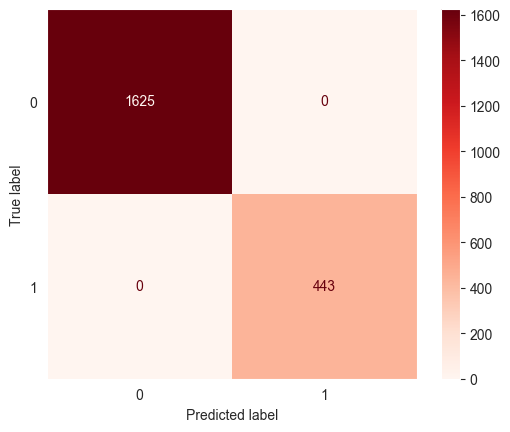

In [71]:
# Check Performance Model against Train-Set
print('F1 Score - Train Set  : ', f1_score(y_train, train_pred1), '\n')
print('Accuracy - Train Set  : ', accuracy_score(y_train, train_pred1), '\n')
print('ROC-AUC - Train Set  : ', roc_auc_score(y_train, train_pred1), '\n')
print('Classification Report : \n', classification_report(y_train, train_pred1), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final_df, y_train, cmap='Reds'))


In [72]:
# Cross Validation using `cross_val_score`
cross_val_rf_tuning= cross_val_score(rf, 
                                           X_train_final_df, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - Mean - Cross Validation : ', cross_val_rf_tuning.mean())
print('F1 Score - Std - Cross Validation  : ', cross_val_rf_tuning.std())

F1 Score - Mean - Cross Validation :  0.4815089489385538
F1 Score - Std - Cross Validation  :  0.04028002887396951


dapat kita lihat bahwa cross validation dari model tree_tuning (dengan hyperparameter) lebih tinggi daripada model dec_model (tanpa hyperparamater).

Tanpa hyperparameter : 
F1 Score - Mean - Cross Validation :   0.47176
F1 Score - Std - Cross Validation  :   0.0240

Dengan hyperparameter :
F1 Score - Mean - Cross Validation :   0.48150
F1 Score - Std - Cross Validation  :   0.0402


F1 Score - Test Set   :  0.5117845117845118 

Accuracy - Test Set  :  0.8365276211950394 

ROC-AUC - Test Set  :  0.6777618364418938 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       697
           1       0.71      0.40      0.51       190

    accuracy                           0.84       887
   macro avg       0.78      0.68      0.71       887
weighted avg       0.82      0.84      0.82       887
 

Confusion Matrix      : 


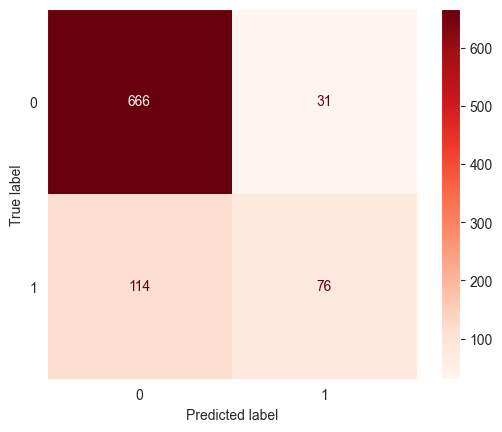

In [73]:
# Check Performance Model against Test-Set

print('F1 Score - Test Set   : ', f1_score(y_test, test_pred1), '\n')
print('Accuracy - Test Set  : ', accuracy_score(y_test, test_pred1), '\n')
print('ROC-AUC - Test Set  : ', roc_auc_score(y_test, test_pred1), '\n')
print('Classification Report : \n', classification_report(y_test, test_pred1), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final_df, y_test, cmap='Reds'))

Dapat dilihat pada test set nya, untuk nilai F1 Score Testnya dari 0.5068 sedikit naik menjadi 0.5117 setelah adanya hyperparameter tuning. untuk nilai ROC_AUC meningkat setelah adanya hyperparameter tuning dari 0.6746 naik sedikit menjadi 0.6777. sedangkan untuk akurasinya, train set dan test set memiliki nilai akurasi train set lebih tinggi daripada test set yang berarti overfitting.  

# 9 - Model Inference

In [74]:
#Show data inference
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment
0,110000,1,1,2,30,1,2,-1,-1,-1,...,1475,3102,3151,0,2373,1475,4000,3000,2373,0
1,270000,2,2,1,35,-1,-1,-1,-1,-1,...,165,0,601,165,165,165,0,601,928,0
2,200000,1,2,1,37,-1,-1,-1,-1,-1,...,3960,6797,4414,4727,2526,3971,6827,4427,5603,0
3,130000,2,3,2,27,0,0,0,0,0,...,46659,47588,47698,5400,3941,1742,1671,1712,1730,0
4,100000,2,3,2,46,-1,-1,-1,2,2,...,203,0,7856,0,203,0,0,7856,10000,0
5,100000,2,2,1,29,0,0,0,2,2,...,84044,84532,80828,2700,8000,4304,3000,0,3000,1
6,400000,2,2,1,24,0,0,0,0,0,...,89128,39276,23440,5519,44776,1502,2026,1015,52100,0
7,130000,2,2,2,24,0,0,0,0,-1,...,19057,2511,10358,10095,7005,6013,2511,10358,5000,0
8,50000,1,2,2,39,1,2,2,2,2,...,37212,39319,36082,0,3000,0,3007,7,3119,0
9,90000,2,1,2,28,0,0,2,2,2,...,91204,89687,91060,5800,5400,5804,0,6700,0,1


In [75]:
#Drop default_payment
X_data_inf = data_inf.drop(['default_payment'], axis=1)
y_data_inf = data_inf['default_payment']

In [76]:
#split between Numerical columns and categorical columns

data_inf_cat = X_data_inf[['sex','education_level','marital_status']]
data_inf_num = X_data_inf.drop(['sex','education_level','marital_status'], axis=1)

data_inf_num

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,110000,30,1,2,-1,-1,-1,0,2932,2373,2373,1475,3102,3151,0,2373,1475,4000,3000,2373
1,270000,35,-1,-1,-1,-1,-1,-1,165,165,165,165,0,601,165,165,165,0,601,928
2,200000,37,-1,-1,-1,-1,-1,-1,3506,4713,2519,3960,6797,4414,4727,2526,3971,6827,4427,5603
3,130000,27,0,0,0,0,0,0,124769,127966,119008,46659,47588,47698,5400,3941,1742,1671,1712,1730
4,100000,46,-1,-1,-1,2,2,-1,3780,0,203,203,0,7856,0,203,0,0,7856,10000
5,100000,29,0,0,0,2,2,2,73742,75216,82006,84044,84532,80828,2700,8000,4304,3000,0,3000
6,400000,24,0,0,0,0,0,0,187790,176294,190256,89128,39276,23440,5519,44776,1502,2026,1015,52100
7,130000,24,0,0,0,0,-1,-1,12163,21895,18885,19057,2511,10358,10095,7005,6013,2511,10358,5000
8,50000,39,1,2,2,2,2,2,39966,37584,38423,37212,39319,36082,0,3000,0,3007,7,3119
9,90000,28,0,0,2,2,2,2,87916,87459,88183,91204,89687,91060,5800,5400,5804,0,6700,0


In [77]:
#Feature Scaling 
data_inf_num_scaled = sc.transform(data_inf_num)
data_inf_num_scaled

array([[1.26582278e-01, 1.87500000e-01, 3.00000000e-01, 4.44444444e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 2.22222222e-01,
        2.65785671e-02, 1.22124188e-01, 4.60214356e-02, 8.98372351e-02,
        1.04981940e-01, 1.51050744e-01, 0.00000000e+00, 1.93385609e-03,
        7.40428394e-03, 2.35240151e-02, 7.73054415e-03, 5.88104089e-03],
       [3.29113924e-01, 2.91666667e-01, 1.00000000e-01, 1.11111111e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 1.11111111e-01,
        2.14985854e-02, 1.18266476e-01, 4.23683105e-02, 8.73906263e-02,
        9.84333669e-02, 1.46051401e-01, 3.34442737e-04, 1.34465341e-04,
        8.28275831e-04, 0.00000000e+00, 1.54868568e-03, 2.29987608e-03],
       [2.40506329e-01, 3.33333333e-01, 1.00000000e-01, 1.11111111e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 1.11111111e-01,
        2.76323834e-02, 1.26212524e-01, 4.62629919e-02, 9.44783214e-02,
        1.12782383e-01, 1.53526890e-01, 9.58127769e-03, 2.0585

In [78]:
#Concate Numerical Columns and Categorical Columns
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[1.26582278e-01, 1.87500000e-01, 3.00000000e-01, 4.44444444e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 2.22222222e-01,
        2.65785671e-02, 1.22124188e-01, 4.60214356e-02, 8.98372351e-02,
        1.04981940e-01, 1.51050744e-01, 0.00000000e+00, 1.93385609e-03,
        7.40428394e-03, 2.35240151e-02, 7.73054415e-03, 5.88104089e-03,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [3.29113924e-01, 2.91666667e-01, 1.00000000e-01, 1.11111111e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 1.11111111e-01,
        2.14985854e-02, 1.18266476e-01, 4.23683105e-02, 8.73906263e-02,
        9.84333669e-02, 1.46051401e-01, 3.34442737e-04, 1.34465341e-04,
        8.28275831e-04, 0.00000000e+00, 1.54868568e-03, 2.29987608e-03,
        2.00000000e+00, 2.00000000e+00, 1.00000000e+00],
       [2.40506329e-01, 3.33333333e-01, 1.00000000e-01, 1.11111111e-01,
        1.25000000e-01, 1.00000000e-01, 1.11111111e-01, 1.11111111e-01,
        2.76323834e-02

In [79]:
#Create Dataframe of `data_inf_final`
data_inf_final_df = pd.DataFrame(data_inf_final, columns=[num_columns + cat_columns])
data_inf_final_df

,limit_balance,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,...,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,sex,education_level,marital_status
0,0.126582,0.187500,0.3,0.444444,0.125,0.1,0.111111,0.222222,0.026579,0.122124,...,0.151051,0.000000,0.001934,0.007404,0.023524,0.007731,0.005881,1.0,1.0,2.0
1,0.329114,0.291667,0.1,0.111111,0.125,0.1,0.111111,0.111111,0.021499,0.118266,...,0.146051,0.000334,0.000134,0.000828,0.000000,0.001549,0.002300,2.0,2.0,1.0
2,0.240506,0.333333,0.1,0.111111,0.125,0.1,0.111111,0.111111,0.027632,0.126213,...,0.153527,0.009581,0.002059,0.019934,0.040150,0.011408,0.013886,1.0,2.0,1.0
3,0.151899,0.125000,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.250261,0.341554,...,0.238386,0.010945,0.003212,0.008745,0.009827,0.004412,0.004287,2.0,3.0,2.0
4,0.113924,0.520833,0.1,0.111111,0.125,0.4,0.444444,0.111111,0.028135,0.117978,...,0.160275,0.000000,0.000165,0.000000,0.000000,0.020244,0.024783,2.0,3.0,2.0
5,0.113924,0.166667,0.2,0.222222,0.250,0.4,0.444444,0.444444,0.156580,0.249392,...,0.303339,0.005473,0.006520,0.021605,0.017643,0.000000,0.007435,2.0,2.0,1.0
6,0.493671,0.062500,0.2,0.222222,0.250,0.2,0.222222,0.222222,0.365962,0.425991,...,0.190828,0.011187,0.036490,0.007540,0.011915,0.002616,0.129120,2.0,2.0,1.0
7,0.151899,0.062500,0.2,0.222222,0.250,0.2,0.111111,0.111111,0.043526,0.156232,...,0.165180,0.020462,0.005709,0.030184,0.014767,0.026691,0.012392,2.0,2.0,2.0
8,0.050633,0.375000,0.3,0.444444,0.500,0.4,0.444444,0.444444,0.094570,0.183643,...,0.215613,0.000000,0.002445,0.000000,0.017684,0.000018,0.007730,1.0,2.0,2.0
9,0.101266,0.145833,0.2,0.222222,0.500,0.4,0.444444,0.444444,0.182602,0.270782,...,0.323399,0.011756,0.004401,0.029135,0.000000,0.017265,0.000000,2.0,1.0,2.0


In [80]:
#Features Selection
data_inf_final_df = data_inf_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)

/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_1532/3005385960.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_inf_final_df = data_inf_final_df.drop(['bill_amt_3', 'sex', 'bill_amt_2', 'pay_6', 'pay_5', 'bill_amt_1'], axis=1)


# Tanpa Hyperparameter Tuning

In [128]:
#Predict
y_pred_inf = pd.DataFrame(rf_model.predict(data_inf_final_df))

# Dengan Hyperparameter Tuning 

In [129]:
#Predict 
rf_pred_tuning =  pd.DataFrame(best_rf.predict(data_inf_final_df))

In [130]:
#Merge columns
preds = pd.concat([data_inf['default_payment'].reset_index(drop=True), y_pred_inf, rf_pred_tuning], axis=1)
preds.columns = ['Actual', 'Random Forest', 'Random Forest dengan Tuning']

preds

,Actual,Random Forest,Random Forest dengan Tuning
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,0,0
6,0,0,0
7,0,0,0
8,0,1,1
9,1,1,1


Berdasarkan tabel diatas, tanpa adanya hyperparameter tuning untuk model Random Forest mampu memprediksi benar 80%. sedangkan, menggunakan hyperparameter tuning terbaik untuk model Random Forest memprediksi benar 80%. artinya, konstan. 

hal ini dikarenakan kenaikan nilai atau score dengan adanya tuning hanya sedikit saja tidak sampai 1 poin. maka sebab itu, tidak terlihat berbeda dengan hasil yang didapatkan. 

# 10 - Pengambilan Keputusan 

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan menggunakan 7 model klasifikasi yang berbeda adalah:

dataset yang digunakan adalah dataset terkait default kartu kredit nasabah pada bulan depan. kartu kredit adalah suatu cara pembayaran angsuran sebagai pengganti uang, yang dapat ditukarkan dengan apa saja yang diinginkan dimana terdapat cabang yang dapat menerima angsuran dengan menggunakan kartu kredit. Pihak bank menganalisa selama 6 bulan terakhir yaitu pada bulan April 2005-September 2005. pada dataset ini yang gagal bayar pada angsuran kartu kredit hanya 21,43%. 

nasabah yang memiliki kartu kredit lebih banyak perempuan daripada laki-laki. selanjutnya, berdasarkan tingkat pendidikan, yang memiliki kartu kredit mayoritas pada kelas pendidikan universitas, hal ini karena tingkat pendapatan pendidikan universitas lebih tinggi daripada graduate school, atau highschool. Sehingga, untuk memiliki kartu kredit lebih mudah diterima oleh pihak bank. Pada kenyataanya, banyak perempuan juga yang nunggak bayar daripada laki-laki. Kemudian, setelah ditelurusi berdasarkan umur, umur dengan tingkat kepemilikan kartu kredit tertinggi yaitu umur 30 tahun. hal ini menunjukkan bahwa seseorang merasa sudah settle secara umum pada umur 27-32 tahun. Dengan demikian, seseorang memberanikan diri memiliki kartu kredit dan merasa mampu membayar cicilannya. pengguna kartu kredit dengan status single justru kemungkinan gagal bayar nya paling tinggi dibandingkan dengan yang sudah menikah atau kategori lainnya. hal ini dikarenakan seseorang dengan status single belum bisa bertanggung jawab sepenuhnya daripada dengan yang sudah menikah atau dapat dikatakan membeli sesuatu semaunya tanpa memikirkan efek kedepannya karena belum memiliki tanggung jawab yang harus dinafkahi. berdasarkan status pelunasan pada bulan September menunjukkan bahwa masih banyak yang menunggak sampe 3 bulan dan justru meningkat dari bulan sebelum- sebelumnya. namun, ada juga yang hanya membayar minimumnya saja. Jumlah nasabah yang tidak memiliki tagihan di kartu kreditnya sangat kecil. pada bulan april sampai agustus tidak ada yang menunggak 1 bulan. kemudian yang bulan agustus tidak segera membayar sehingga menunggak pada bulan september. 
Secara umum, batas kredit tertinggi dimiliki oleh Graduate school, hal ini disesuaikan dengan kemampuan nasabah membayar tepat waktu sesuai dengan tingkat pendidikannya. di dalam kategori Other, dalam insight sebelumnya memiliki kemungkinan gagal bayar paling rendah, seharusnya pihak bank berani menawarkan batas kredit yang tinggi, namun, pada kenyataanya batas kredit Others justru lebih rendah daripada lainnya. 

setelah dilakukan EDA, melakukan select features dengan menggunakan Chi-Squared dan diperoleh 17 features yang digunakan. lalu, didapapatkan 1 model klasifikasi dengan performa terbaik yaitu Random Forest dari 7 model yang ada. 
selanjutnya, dilakukan hyperparameter tuning GridSearchCV dengan best hyperparameter. dengan adanya hyperparameter terjadi peningkatan value:
- F1 score, ROC-AUC score dan cross validation dari model tree_tuning (dengan hyperparameter) lebih tinggi daripada model dec_model (tanpa hyperparamater).

model Random Forest tanpa hyperparamter digunakan untuk memprediksi data inference, diperoleh akurasi 80% memprediksi dengan benar, sedangkan dengan hyperparameter yang memiliki performa terbaik akan digunakan untuk memprediksi data inference, dan diperoleh akurasi 80% memprediksi dengan benar.

untuk analisa lebih lanjut, kita dapat memaksimalkan model kita dengan pengambilan data baru yang diharapkan data tidak imbalance. dapat mencoba algoritma-algoritma lain, serta menambahkan fitur-fitur lain seperti jumlah keluarga, pendapatan pengguna kredit, dll. 



# Conceptual Problems :

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

- parameter untuk memisahkan atribut atau features. Untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree.

- criterion gini : criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada Atribut yang dipilih menghasilkan pengurangan indeks gini rata-rata dari himpunan bagian yang dihasilkan

2. Apakah fungsi dari pruning pada Tree model?

- mengidentifikasi dan membuang cabang yang tidak diperlikan pada pohon yang telah terbentuk. hal ini dikarenakan, pohon keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pruning berdasarkan nilai kepercayaan (confident level)

3. Bagaimana cara memilih K yang optimal pada KNN?

- Pilihan k akan sangat bergantung pada data input karena data dengan lebih banyak outlier atau noise kemungkinan akan berkinerja lebih baik dengan nilai k yang lebih tinggi. Secara keseluruhan, disarankan untuk memilih nilai k berupa angka ganjil untuk menghindari ikatan dalam klasifikasi. Strategi cross validation juga dapat digunakan untuk membantu kita memilih k yang optimal untuk dataset yang kita miliki.

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

- metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi/ evaluasi. model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. 

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

- Accuracy adalah tingkat kedetakan antara nilai yang didapat terhadap nilai yang sebenarnya

- Precision adalah kecocokan antara bagian data yang diambil dengan informasi yang dibutuhkan. Perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif.

- Recall adalah tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.

- F1 Score adalah harmonic mean dari skor precision dan skor recall dan digunakan sebagai metriks dalam skenario di mana memilih precision atau recall. 

